**BrainStation Capstone Project**

**Author: Lynn Ho**

# **Crafting the Perfect Beer:** Predicting Beer Ratings with Sentiment Analysis and Clustering

## Part I: Data Cleaning, Preprocessing, and EDA

---

## Introduction

>
> “Humankind was built on beer. From the world’s first writing to its first laws, in rituals social, religious, and political, civilization is soaked in beer.”
>
> *–William Bostwick*

Beer is one of the oldest and most widely consumed alcoholic beverages in the world. The global beer market in 2020 was valued at US\\$623 billion<sup><a href='#footnotes'>1</a></sup> and the beer market in the U.S. alone totaled US\\$94 billion <sup><a href='#footnotes'>2</a></sup>. With the increased interest in craft beer over the last decade, the overall beer market has grown exponentially as well. In the U.S., the total number of craft breweries increased from 1,813 in 2010 to 8,764 in 2020<sup><a href='#footnotes'>2</a></sup>, which is a 480% growth.

Although the U.S. craft beer market has been negatively affected by the COVID-19 pandemic over the last two years, with many breweries having to shut down their on-site operations temporarily, it is expected that the market will recover by 2022<sup><a href='#footnotes'>2</a></sup> and the global craft beer market is projected to grow from the current US\\$89 billion to US\\$191 billion by the end of 2027<sup><a href='#footnotes'>3</a></sup>.

Given the historical and projected market trends, it is safe to say that craft beer is here to stay.

---

## Business Question

There are also thousands of beers and lots of breweries in the market with different product and branding styles. In fact, there are over 100 documented styles of beer from all regions of the world, there is a wide variety of characteristics that can be used to describe and rate a beer, such as alcohol percentage, clarity, colour, and aroma, just to name a few<sup><a href='#footnotes'>4</a></sup>. So,

- **How can we use machine learning to predict a beer rating?**
- **What are the characteristics of a beer that make it more appealing; i.e. get a higher review rating?**

By addressing these questions, beer brewers can use the information gathered to understand market trends and craft beers that suit the palates and tastes of consumers. While not the focus of this project, this information can also be further used to generate recommendation systems that suggest other beers to consumers who might not have known about them otherwise. Both applications will ultimately help to increase sales and profit for the breweries.

---

## Methodology

The data used for this project was originally obtained from <a href="https://www.beeradvocate.com/">BeerAdvocate.com </a>, one of the original beer review websites that started in 1996. The dataset contains 9.07 million beer reviews from 1996 to 2018 and consists of three csv files: the main dataset for the actual reviews, and two metadata files providing information about the beers and breweries that were reviewed. The dataset was found on <a href="https://www.kaggle.com/ehallmar/beers-breweries-and-beer-reviews?select=beers.csv">Kaggle</a> and can be downloaded <a href="https://drive.google.com/file/d/1yUEv5bXraRvdC4z0hdCcrnmAlK86vLd8/view?usp=sharing">here</a>.

After cleaning the data, I used TF-IDF vectorization to process the text reviews, and then preformed the following machine learning models to predict whether a review was good or bad:

- Logistic Regression
- Decision Tree
- XGBoost

Finally, I used K-Means Clustering on the text reviews to try and find groups with common features.

---

## Data Overview

Let's take some time first to review the data dictionaries:

| Reviews Table | Description |
| :- | :- |
| `beer_id` | unique ID for each beer reviewed |
| `username` | unique usernames for each reviewer |
| `date` | date that the review was made |
| `text` | additional text review |
| `look` | rating given by taster for the look of the beer on a scale of 1 to 5|
| `smell` | rating given by taster for the smell of the beer on a scale of 1 to 5 |
| `taste` | rating given by taster for the taste of the beer on a scale of 1 to 5 |
| `feel` | rating given by taster for the feel of the beer on a scale of 1 to 5 |
| `overall` | overall rating given by taster for the beer on a scale of 1 to 5 |
| `score` | weighted average of the previous 5 rating metrics on a scale of 1 to 5; this is our target for the classification models |

<br>

| Beers Table | Description |
| :- | :- |
| `id` | unique ID for each beer reviewed |
| `name` | name of the beer |
| `brewery_id` | unique ID for the brewery that produced the beer |
| `country` | country where the beer was produced |
| `style` | style of beer |
| `availability` | availability of the beer - seasonal, rotating, or limited (only brewed once) |
| `abv` | alcohol by volume (percentage) |
| `notes` | additional notes about the beer (text) |
| `retired` | whether the beer is retired or active ('true' for retired and 'false' for active) |

<br>

| Breweries Table | Description |
| :- | :- |
| `id` | unique ID for the brewery that produced the beer |
| `name` | name of the brewery |
| `city` | city where the beer was produced |
| `state` | state where the beer was produced |
| `country` | country where the beer was produced |
| `notes` | additional notes about the brewery (text) |
| `types` | type of brewery |

---

## Data Cleaning & Preprocessing

Before any analysis can be done, I need to first clean and preprocess the data. Let's read in all of the files first.

In [1]:
# import usual tools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in 'reviews.csv' file

reviews_df = pd.read_csv('data/reviews.csv')

In [3]:
# check and take a look at first few rows

reviews_df.head()

,beer_id,username,date,text,look,smell,taste,feel,overall,score
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03
1,125646,_dirty_,2017-12-21,,4.50,4.50,4.50,4.50,4.50,4.50
2,125646,CJDUBYA,2017-12-21,,4.75,4.75,4.75,4.75,4.75,4.75
3,125646,GratefulBeerGuy,2017-12-20,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58
4,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31


The `reviews` file was read in properly so I can move on with the `beers` file.

In [4]:
# read in 'beers.csv'

beers_df = pd.read_csv('data/beers.csv')

In [5]:
# check and take a look at first few rows

beers_df.head()

,id,name,brewery_id,state,country,style,availability,abv,notes,retired
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,7.3,No notes at this time.,f
1,82352,Konrads Stout Russian Imperial Stout,18604,NaN,NO,Russian Imperial Stout,Rotating,10.4,No notes at this time.,f
2,214879,Scottish Right,44306,IN,US,Scottish Ale,Year-round,4.0,No notes at this time.,t
3,320009,MegaMeow Imperial Stout,4378,WA,US,American Imperial Stout,Winter,8.7,Every time this year,f
4,246438,Peaches-N-Cream,44617,PA,US,American Cream Ale,Rotating,5.1,No notes at this time.,f


The `beers` file was also read in properly so I can read in the last file.

In [6]:
# read in 'breweries.csv' file

breweries_df = pd.read_csv('data/breweries.csv')

In [7]:
# check and take a look at first few rows

breweries_df.head()

,id,name,city,state,country,notes,types
0,19730,Brouwerij Danny,Erpe-Mere,NaN,BE,No notes at this time.,Brewery
1,32541,Coachella Valley Brewing Co,Thousand Palms,CA,US,No notes at this time.,"Brewery, Bar, Beer-to-go"
2,44736,Beef 'O' Brady's,Plant City,FL,US,No notes at this time.,"Bar, Eatery"
3,23372,Broadway Wine Merchant,Oklahoma City,OK,US,No notes at this time.,Store
4,35328,Brighton Beer Dispensary (DUPLICATE),Brighton,GB2,GB,Duplicate of https://www.beeradvocate.com/beer...,"Bar, Eatery"


Now that all of the files have been read in, I can proceed with cleaning each dataset, starting with the `reviews` table.

---

### 1. Reviews Table

In [8]:
# shape

reviews_df.shape

(9073128, 10)

The `reviews` table has 9,073,128 rows (i.e. reviews) and 10 columns.

In [9]:
# get info

reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9073128 entries, 0 to 9073127
Data columns (total 10 columns):
 #   Column    Dtype  
---  ------    -----  
 0   beer_id   int64  
 1   username  object 
 2   date      object 
 3   text      object 
 4   look      float64
 5   smell     float64
 6   taste     float64
 7   feel      float64
 8   overall   float64
 9   score     float64
dtypes: float64(6), int64(1), object(3)
memory usage: 692.2+ MB


All of the columns are numerical except for the `username`, `date`, and `text`. Let's check for duplicated rows and missing values.

In [10]:
# check for duplicated rows

reviews_df.duplicated().sum()

0

There are no duplicated rows so we can move on to checking for missing values.

In [11]:
# check for missing values

reviews_df.isna().sum()

beer_id           0
username       3815
date              0
text              0
look        3790018
smell       3790018
taste       3790018
feel        3790018
overall     3790018
score             0
dtype: int64

There are 3,815 missing `username` values and 3,790,018 missing values in each of the `look`, `smell`, `taste`, `feel`, and `overall` columns. There is no way to guess what the usernames would be so these rows can be dropped. By looking at the first few rows of the table, I can see that the `score` is a weighted average of the five rating metrics, but it is unclear how hey are weighted. Therefore, it won't be possible to impute the missing values with the `score` values. Even though these missing values make up over 40% of the dataset, there would still be over 5 million reviews if I dropped these rows, which is more than enough to perform the analyses. So I opt to drop these rows from the dataset.

In [12]:
# drop all missing values

reviews_clean = reviews_df.dropna()

In [13]:
# check

reviews_clean.isna().sum()

beer_id     0
username    0
date        0
text        0
look        0
smell       0
taste       0
feel        0
overall     0
score       0
dtype: int64

The rows with missing values have been dropped successfully and the `reviews` table is now clean.

In [14]:
# shape of reviews_df without missing values

reviews_clean.shape

(5281976, 10)

The cleaned `reviews` table has 5,281,976 rows. I can now take a look at the summary of statistics.

In [15]:
# get summary of statistics

reviews_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
beer_id,5281976.0,91513.495092,88959.588657,3.0,15813.00,64219.0,146510.00,373104.0
look,5281976.0,3.952183,0.551717,1.0,3.75,4.0,4.25,5.0
smell,5281976.0,3.887906,0.611591,1.0,3.50,4.0,4.25,5.0
taste,5281976.0,3.920744,0.633323,1.0,3.50,4.0,4.25,5.0
feel,5281976.0,3.884379,0.599931,1.0,3.50,4.0,4.25,5.0
overall,5281976.0,3.916315,0.605445,1.0,3.50,4.0,4.25,5.0
score,5281976.0,3.911546,0.565017,1.0,3.65,4.0,4.27,5.0


The mean ratings for each of the review metrics is ~3.9 and the ratings range from 1 to 5. Let's take a look at the distributions for each metric.

<ipython-input-16-e47f4e12d62a>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


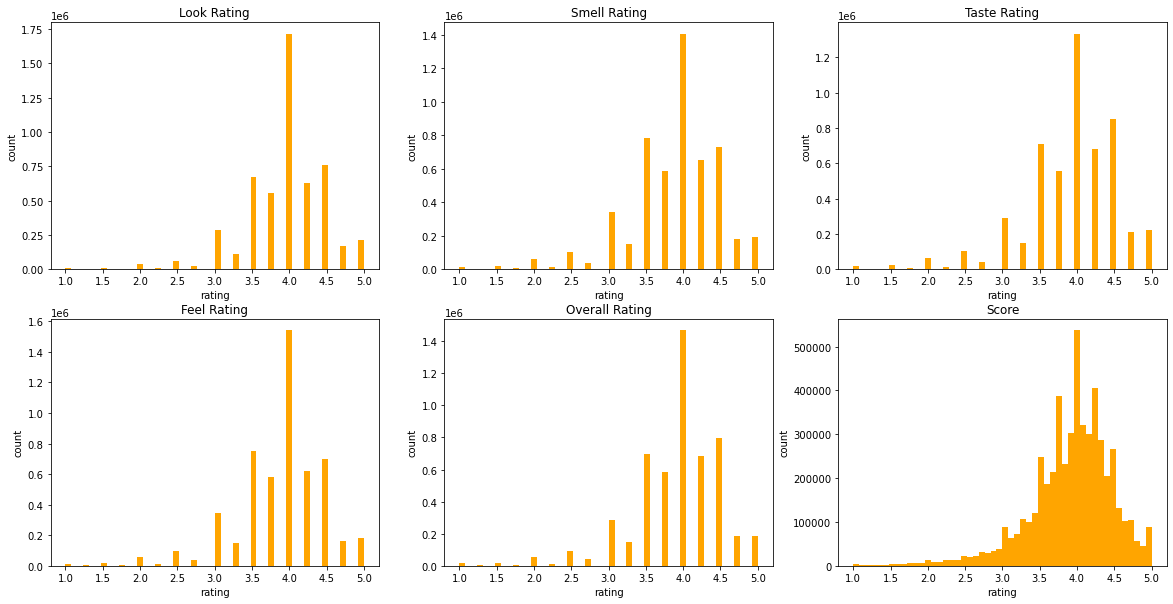

In [16]:
# visualize distribution of all metrics, including `score`

fig, axs = plt.subplots(2, 3, figsize = (20, 10))
axs[0, 0].hist(reviews_clean['look'], bins = 50, color='orange')
axs[0, 0].set_title('Look Rating')
axs[0, 1].hist(reviews_clean['smell'], bins = 50, color='orange')
axs[0, 1].set_title("Smell Rating")
axs[0, 2].hist(reviews_clean['taste'], bins = 50, color='orange')
axs[0, 2].set_title('Taste Rating')
axs[1, 0].hist(reviews_clean['feel'], bins = 50, color='orange')
axs[1, 0].set_title('Feel Rating')
axs[1, 1].hist(reviews_clean['overall'], bins = 50, color='orange')
axs[1, 1].set_title('Overall Rating')
axs[1, 2].hist(reviews_clean['score'], bins = 50, color='orange')
axs[1, 2].set_title('Score')
fig.show()

for ax in axs.flat:
    ax.set(xlabel='rating', ylabel='count')

All of the ratings are skewed to the left and all have similar distributions to each other. For each metric, over 50% have ratings of 4 and higher.

In [17]:
# number of unique `username`, `beer_id`

print(f'Number of users: {reviews_clean["username"].nunique()}')
print(f'Number of beers: {reviews_clean["beer_id"].nunique()}')

Number of users: 110504
Number of beers: 155760


There are 110,504 unique users who submitted reviews and 155,760 unique beers that were reviewed in this dataset.

I will now convert the `date` column to datetime format and extract the year, month, and day of the week.

In [18]:
# change date to datetime format

reviews_clean["date"] = pd.to_datetime(reviews_clean["date"])

<ipython-input-18-b09adb98073e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_clean["date"] = pd.to_datetime(reviews_clean["date"])


In [19]:
# check

reviews_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5281976 entries, 0 to 9073114
Data columns (total 10 columns):
 #   Column    Dtype         
---  ------    -----         
 0   beer_id   int64         
 1   username  object        
 2   date      datetime64[ns]
 3   text      object        
 4   look      float64       
 5   smell     float64       
 6   taste     float64       
 7   feel      float64       
 8   overall   float64       
 9   score     float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 443.3+ MB


The `date` column was successfully converted to the correct format so now I can proceed to extracting the parts of the date.

In [20]:
# extract year from date and add as new column

reviews_clean['year'] = reviews_clean['date'].dt.year

<ipython-input-20-ee7506fb7fcb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_clean['year'] = reviews_clean['date'].dt.year


In [21]:
# extract month from date and add as new column

reviews_clean['month'] = reviews_clean['date'].dt.month

<ipython-input-21-e0e6b00888c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_clean['month'] = reviews_clean['date'].dt.month


In [22]:
# extract day of week from date and add as new column

reviews_clean['weekday'] = reviews_clean['date'].dt.dayofweek

<ipython-input-22-f09996c831f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_clean['weekday'] = reviews_clean['date'].dt.dayofweek


In [23]:
# check

reviews_clean.head()

,beer_id,username,date,text,look,smell,taste,feel,overall,score,year,month,weekday
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03,2017,3,4
1,125646,_dirty_,2017-12-21,,4.50,4.50,4.50,4.50,4.50,4.50,2017,12,3
2,125646,CJDUBYA,2017-12-21,,4.75,4.75,4.75,4.75,4.75,4.75,2017,12,3
3,125646,GratefulBeerGuy,2017-12-20,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58,2017,12,2
4,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31,2017,12,2


The individual date columns have been extracted and added to the dataset, so I can now drop the original `date` column.

In [24]:
# drop 'date' column

reviews_clean = reviews_clean.drop(columns = 'date')

Since I added the date columns to the dataset, I will check again for missing values to make sure that everything was added properly.

In [25]:
# sanity check for missing values

reviews_clean.isna().sum()

beer_id     0
username    0
text        0
look        0
smell       0
taste       0
feel        0
overall     0
score       0
year        0
month       0
weekday     0
dtype: int64

There are no missing values. I can now take a look at the distributions of the `year`, `month`, and `weekday` columns.

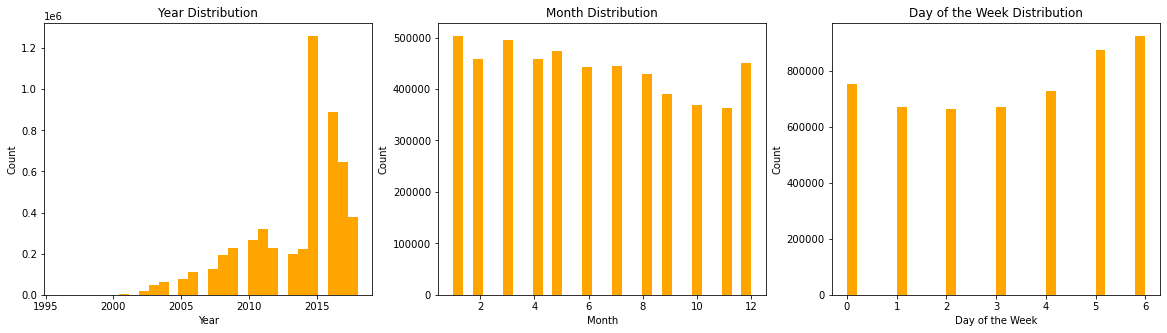

In [26]:
# visualize `year`, `month`, and `weekday` distributions

plt.subplots(1,3,figsize =(20,5))

plt.subplot(1,3,1)
plt.hist(reviews_clean['year'], bins = 30, color='orange')
plt.title('Year Distribution')
plt.xlabel('Year')
plt.ylabel('Count')

plt.subplot(1,3,2)
plt.hist(reviews_clean['month'], bins = 30, color='orange')
plt.title('Month Distribution')
plt.xlabel('Month')
plt.ylabel('Count')

plt.subplot(1,3,3)
plt.hist(reviews_clean['weekday'], bins = 30, color='orange')
plt.title('Day of the Week Distribution')
plt.xlabel('Day of the Week')
plt.ylabel('Count')

plt.show()

About half of the reviews in this dataset were made between 2015 to 2018, with the most reviews in 2015. Interestingly, the number of reviews peak in January and decrease gradually until December, where it picks up again. Unsurprisingly, more reviews were made on weekends (Saturday and Sunday).

I will now move on to cleaning the `beers` table.

---

### 2. Beers Table

First, I want to look at the first few rows of this table again.

In [27]:
# look at the first few rows again

beers_df.head()

,id,name,brewery_id,state,country,style,availability,abv,notes,retired
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,7.3,No notes at this time.,f
1,82352,Konrads Stout Russian Imperial Stout,18604,NaN,NO,Russian Imperial Stout,Rotating,10.4,No notes at this time.,f
2,214879,Scottish Right,44306,IN,US,Scottish Ale,Year-round,4.0,No notes at this time.,t
3,320009,MegaMeow Imperial Stout,4378,WA,US,American Imperial Stout,Winter,8.7,Every time this year,f
4,246438,Peaches-N-Cream,44617,PA,US,American Cream Ale,Rotating,5.1,No notes at this time.,f


In [28]:
# shape

beers_df.shape

(358873, 10)

The `beers` table has 358,873 rows (i.e. beers) and 10 columns.

In [29]:
# check for duplicate rows

beers_df.duplicated().sum()

0

There are no duplicate rows in this table so I can move on to check for missing values.

In [30]:
# number of missing values

beers_df.isna().sum()

id                  0
name                0
brewery_id          0
state           60726
country           154
style               1
availability        0
abv             38797
notes              46
retired             0
dtype: int64

There are lots of missing values in the `state`, `country`, `abv`, and `notes` columns and one missing value in the `style` column. Because I will be imputing these, I need to make a copy of our original dataframe first.

In [31]:
# make copy of beers dataframe

beers_clean = beers_df.copy()

For the `notes` column, I can see that there are some that say "No notes at this time", so I will fill the missing values here with this string.

In [32]:
# impute missing notes with 'No notes at this time.'

beers_clean['notes'] = beers_clean['notes'].fillna('No notes at this time.')

In [33]:
# check

beers_clean.isna().sum()

id                  0
name                0
brewery_id          0
state           60726
country           154
style               1
availability        0
abv             38797
notes               0
retired             0
dtype: int64

The `notes` column no longer has any missing values. I can move on to the `style` column, which has only 1 missing value.

In [34]:
# locate row with missing `style`

beers_clean.loc[beers_clean['style'].isna()]

,id,name,brewery_id,state,country,style,availability,abv,notes,retired
206943,24360,American Three Threads,14,MA,US,NaN,Limited (brewed once),NaN,No notes at this time.,t


Looking up the "American Three Threads' beer on Google, I found that it was a Porter, so I will impute this in the dataframe. 

In [35]:
# impute missing style with 'porter'

beers_clean['style'] = beers_clean['style'].fillna('porter')

In [36]:
# check

beers_clean.isna().sum()

id                  0
name                0
brewery_id          0
state           60726
country           154
style               0
availability        0
abv             38797
notes               0
retired             0
dtype: int64

The `style` column no longer has any missing values, but I want to take a look at how many styles of beer are in this dataset.

In [37]:
# get number of unique beer styles

beers_clean['style'].nunique()

113

There are 113 different styles of beer here! That is a lot to work with, so I will refer to BeerAdvocate's <a href="https://www.beeradvocate.com/beer/styles/">"Beer Styles guide"</a> to put each of these styles into their respective broader beer categories. There are 14 general categories of beer: bock, brown ale, dark ale, dark lager, hybrid, India Pale Ale (IPA), pale ale, pale lager, porter, specialty, stout, strong ale, wheat, and wild/sour.

I will first make a list of all of the `styles` present in this dataset.

In [38]:
# list all unique beer styles

list(beers_clean['style'].unique())

['English Oatmeal Stout',
 'Russian Imperial Stout',
 'Scottish Ale',
 'American Imperial Stout',
 'American Cream Ale',
 'Japanese Rice Lager',
 'American Lager',
 'American IPA',
 'German Bock',
 'English Stout',
 'English Bitter',
 'Belgian Witbier',
 'American Strong Ale',
 'American Pale Wheat Ale',
 'Berliner Weisse',
 'American Pale Ale (APA)',
 'British Barleywine',
 'American Black Ale',
 'Baltic Porter',
 'American Adjunct Lager',
 'European Pale Lager',
 'American Porter',
 'Fruit and Field Beer',
 'American Imperial IPA',
 'American Wild Ale',
 'Irish Red Ale',
 'English Pale Ale',
 'American Amber / Red Lager',
 'Belgian Saison',
 'Belgian IPA',
 'Rye Beer',
 'Belgian Quadrupel (Quad)',
 'German Hefeweizen',
 'American Stout',
 'Smoke Beer',
 'Belgian Tripel',
 'American Amber / Red Ale',
 'Pumpkin Beer',
 'German Maibock',
 'German Dunkelweizen',
 'Belgian Dark Ale',
 'Vienna Lager',
 'English Extra Special / Strong Bitter (ESB)',
 'English Sweet / Milk Stout',
 'Scotch A

Now I will create a dictionary that matches each beer style with its respective category, and then map it in a separate column in the `beers_clean` dataframe.

In [39]:
# create beer style dictionary to match each style with its category

style_dict = {
    'English Oatmeal Stout': "stout",
    'Russian Imperial Stout': "stout",
    'Scottish Ale': "dark ale",
    'American Imperial Stout': "stout",
    'American Cream Ale': "hybrid",
    'Japanese Rice Lager': "specialty",
    'American Lager': "pale lager",
    'American IPA': "IPA",
    'German Bock': "bock",
    'English Stout': "stout",
    'English Bitter': "pale ale",
    'Belgian Witbier': "wheat",
    'American Strong Ale': "strong ale",
    'American Pale Wheat Ale': "wheat",
    'Berliner Weisse': "wild/sour",
    'American Pale Ale (APA)': "pale ale",
    'British Barleywine': "strong ale",
    'American Black Ale': "IPA",
    'Baltic Porter': "porter",
    'American Adjunct Lager': "pale lager",
    'European Pale Lager': "pale lager",
    'American Porter': "porter",
    'Fruit and Field Beer': "specialty",
    'American Imperial IPA': "IPA",
    'American Wild Ale': "wild/sour",
    'Irish Red Ale': "pale ale",
    'English Pale Ale': "pale ale",
    'American Amber / Red Lager': "dark lager",
    'Belgian Saison': "pale ale",
    'Belgian IPA': "IPA",
    'Rye Beer': "specialty",
    'Belgian Quadrupel (Quad)': "strong ale",
    'German Hefeweizen': "wheat",
    'American Stout': "stout",
    'Smoke Beer': "specialty",
    'Belgian Tripel': "strong ale",
    'American Amber / Red Ale': "pale ale",
    'Pumpkin Beer': "specialty",
    'German Maibock': "bock",
    'German Dunkelweizen': "wheat",
    'Belgian Dark Ale': "brown ale",
    'Vienna Lager': "dark lager",
    'English Extra Special / Strong Bitter (ESB)': "pale ale",
    'English Sweet / Milk Stout': "stout",
    'Scotch Ale / Wee Heavy': "strong ale",
    'Leipzig Gose': "wild/sour",
    'German Pilsner': "pale lager",
    'German Kristalweizen': "wheat",
    'German Märzen / Oktoberfest': "dark lager",
    'American Brown Ale': "brown ale",
    'American Blonde Ale': "pale ale",
    'Bohemian Pilsener': "pale lager",
    'American Barleywine': "strong ale",
    'Foreign / Export Stout': "stout",
    'Belgian Strong Pale Ale': "strong ale",
    'European Export / Dortmunder': "pale lager",
    'French Bière de Garde': "pale ale",
    'California Common / Steam Beer': "hybrid",
    'English India Pale Ale (IPA)': "IPA",
    'Winter Warmer': "dark ale",
    'German Helles': "pale lager",
    'American Imperial Red Ale': "strong ale",
    'European Strong Lager': "pale lager",
    'Belgian Dubbel': "dark ale",
    'English Porter': "porter",
    'Belgian Gueuze': "wild/sour",
    'German Rauchbier': "dark lager",
    'German Altbier': "brown ale",
    'English Brown Ale': "brown ale",
    'American Light Lager': "pale lager",
    'European Dark Lager': "dark lager",
    'Belgian Strong Dark Ale': "strong ale",
    'Belgian Pale Ale': "pale ale",
    'German Doppelbock': "bock",
    'German Kölsch': "pale ale",
    'German Schwarzbier': "dark lager",
    'Herb and Spice Beer': "specialty",
    'English Old Ale': "strong ale",
    'German Kellerbier / Zwickelbier': "pale lager",
    'Munich Dunkel Lager': "dark lager",
    'Chile Beer': "specialty",
    'English Pale Mild Ale': "pale ale",
    'Irish Dry Stout': "stout",
    'German Weizenbock': "bock",
    'American Brett': "wild/sour",
    'Belgian Fruit Lambic': "wild/sour",
    'Wild/Sour Beers': "wild/sour",
    'Robust Porter': "porter",
    'Smoke Porter': "porter",
    'American Wheatwine Ale': "strong ale",
    'American Dark Wheat Ale': "wheat",
    'Flanders Oud Bruin': "wild/sour",
    'German Roggenbier': "dark ale",
    'Finnish Sahti': "specialty",
    'American Malt Liquor': "pale lager",
    'American Imperial Pilsner': "pale lager",
    'Belgian Blonde Ale': "pale ale",
    'American Imperial Porter': "porter",
    'Scottish Gruit / Ancient Herbed Ale': "specialty",
    'American Brut IPA': "IPA",
    'Flanders Red Ale': "IPA",
    'Low Alcohol Beer': "specialty",
    'English Dark Mild Ale': "brown ale",
    'New England IPA': "IPA",
    'English Strong Ale': "strong ale",
    'Japanese Happoshu': "specialty",
    'Russian Kvass': "specialty",
    'Braggot': "hybrid",
    'Belgian Lambic': "wild/sour",
    'Bière de Champagne / Bière Brut': "hybrid",
    'German Eisbock': "bock",
    'Belgian Faro': "wild/sour", 
    'porter': "porter"
}

In [40]:
# map styles with category in separate column

beers_clean['category'] = beers_clean['style'].map(style_dict).fillna(beers_clean['style'])

In [41]:
# check

beers_clean.head()

,id,name,brewery_id,state,country,style,availability,abv,notes,retired,category
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,7.3,No notes at this time.,f,stout
1,82352,Konrads Stout Russian Imperial Stout,18604,NaN,NO,Russian Imperial Stout,Rotating,10.4,No notes at this time.,f,stout
2,214879,Scottish Right,44306,IN,US,Scottish Ale,Year-round,4.0,No notes at this time.,t,dark ale
3,320009,MegaMeow Imperial Stout,4378,WA,US,American Imperial Stout,Winter,8.7,Every time this year,f,stout
4,246438,Peaches-N-Cream,44617,PA,US,American Cream Ale,Rotating,5.1,No notes at this time.,f,hybrid


The `category` column was added properly, but just to double check, I want to make sure there are only 14 unique categories.

In [42]:
# check number of unique beer categories

beers_clean['category'].nunique()

14

There are 14 beer categories, which is what what I was looking for, so the `style` column can be dropped now.

In [43]:
# drop `style` column

beers_clean = beers_clean.drop(columns = 'style')

In [44]:
# check

beers_clean.head()

,id,name,brewery_id,state,country,availability,abv,notes,retired,category
0,202522,Olde Cogitator,2199,CA,US,Rotating,7.3,No notes at this time.,f,stout
1,82352,Konrads Stout Russian Imperial Stout,18604,NaN,NO,Rotating,10.4,No notes at this time.,f,stout
2,214879,Scottish Right,44306,IN,US,Year-round,4.0,No notes at this time.,t,dark ale
3,320009,MegaMeow Imperial Stout,4378,WA,US,Winter,8.7,Every time this year,f,stout
4,246438,Peaches-N-Cream,44617,PA,US,Rotating,5.1,No notes at this time.,f,hybrid


I will take a look at the distribution of beer categories later when all of the tables are merged. For now, I will return to dealing with missing values in the `beers_clean` dataframe.

In [45]:
# check missing values again

beers_clean.isna().sum()

id                  0
name                0
brewery_id          0
state           60726
country           154
availability        0
abv             38797
notes               0
retired             0
category            0
dtype: int64

There are 154 missing values in the `country` column. I need to locate these rows, put them into a dataframe, and sort by `brewery_id` to see how many breweries are missing the country column. 

In [46]:
# put rows with missing country values into dataframe

missing_country = pd.DataFrame(beers_clean.loc[beers_clean['country'].isna()])

# sort by 'brewery_id' and get number of unique id's

missing_country.sort_values(by = ['brewery_id'])

,id,name,brewery_id,state,country,availability,abv,notes,retired,category
140066,7383,Urbock,1722,NaN,NaN,Spring,7.00,Hansa Urbock,f,bock
106048,21670,Windhoek Draught,1722,NaN,NaN,Year-round,4.00,No notes at this time.,f,pale lager
131189,5494,Windhoek Lager,1722,NaN,NaN,Year-round,4.00,No notes at this time.,f,pale lager
131193,5500,Windhoek Light,1722,NaN,NaN,Year-round,2.00,No notes at this time.,f,pale lager
132701,5789,Windhoek Special,1722,NaN,NaN,Year-round,5.30,No notes at this time.,f,pale lager
...,...,...,...,...,...,...,...,...,...,...
106898,75245,Wasatch Little Slammers Golden Ale,28908,NaN,NaN,Summer,5.20,No notes at this time.,f,pale ale
19427,72090,Squatters Big Cottonwood,28908,NaN,NaN,Year-round,5.75,No notes at this time.,f,pale ale
105592,52369,Squatters Oktoberfest,28908,NaN,NaN,Fall,5.50,This 20th Annibrewsary Lager is a traditional ...,f,dark lager
13185,33258,Wasatch Pumpkin Ale,28908,NaN,NaN,Fall,4.00,No notes at this time.,f,specialty


In [47]:
# get unique brewery id's from missing_country table

missing_country['brewery_id'].unique()

array([28908, 20786,  1722,  1723])

There are only 4 breweries that are missing their country names, so I will locate them in the `breweries_df` table to see if the countries are there and if not, get the names of the breweries so that I can fill in the missing countries.

In [48]:
# locate the brewery_id's in the breweries_df table to see if we can get missing info from there

breweries_df.loc[(breweries_df['id'] == 1722) | (breweries_df['id'] == 1723) | (breweries_df['id'] == 20786) | (breweries_df['id'] == 28908)]

,id,name,city,state,country,notes,types
9915,1722,Namibia Breweries Limited,Windhoek,NaN,NaN,No notes at this time.,Brewery
27303,28908,Utah Brewers Cooperative,NaN,UT,US,No notes at this time.,Brewery
31869,1723,Hansa Brauerei / Namibia Breweries,Swakopmund,NaN,NaN,At least some of the beer is contract brewed b...,Brewery
38980,20786,Camelthorn Brewing Company Ltd,Windhoek,NaN,NaN,No notes at this time.,Brewery


I can see that brewery ID 28908 is in the US and after doing some searching on Google, I discover that the other missing breweries are all in Namibia, which has a country code of "NA". I can now impute these into the `beers_clean` dataframe. 

In [49]:
# impute missing country values for brewery_id's 1722, 1723, and 20786 with NA (Namibia)

NA = (beers_clean['brewery_id']==1722) | (beers_clean['brewery_id']==1723) | (beers_clean['brewery_id']==20786)

beers_clean.loc[NA, 'country'] = beers_clean.loc[NA, 'country'].fillna('NA')

In [50]:
# impute missing country values for brewery_id 28908 with US

US = (beers_clean['brewery_id']==28908)

beers_clean.loc[US, 'country'] = beers_clean.loc[US, 'country'].fillna('US')

In [51]:
# check

beers_clean.isna().sum()

id                  0
name                0
brewery_id          0
state           60726
country             0
availability        0
abv             38797
notes               0
retired             0
category            0
dtype: int64

There are no more missing values in the `country` column. I will tackle the `state` column next by putting them all in a dataframe first and then sort by country.

In [52]:
# put rows with missing state values into dataframe

missing_state = pd.DataFrame(beers_clean.loc[beers_clean['state'].isna()])
missing_state

,id,name,brewery_id,state,country,availability,abv,notes,retired,category
1,82352,Konrads Stout Russian Imperial Stout,18604,NaN,NO,Rotating,10.40,No notes at this time.,f,stout
5,8036,World Burp Beer 2002,3469,NaN,JP,Limited (brewed once),5.50,No notes at this time.,t,specialty
7,345382,Divina IPA,45567,NaN,IT,Rotating,6.50,No notes at this time.,f,IPA
10,106840,Firehouse Coffee Stout,25251,NaN,AU,Limited (brewed once),5.00,No notes at this time.,t,stout
18,219798,Ocean Barley Wine,16420,NaN,SE,Year-round,9.80,No notes at this time.,f,strong ale
...,...,...,...,...,...,...,...,...,...,...
358838,296949,Hazy Days,18604,NaN,NO,Limited (brewed once),4.70,No notes at this time.,t,pale ale
358842,213731,Bien-Sûr,16790,NaN,BE,Rotating,7.00,No notes at this time.,f,wild/sour
358850,237431,Bling Bling,31311,NaN,BE,Rotating,8.88,A Triple made with 24 Carat Gold malt and real...,f,strong ale
358861,212410,Hop Heaven,13067,NaN,AU,Year-round,5.00,No notes at this time.,f,pale ale


In [53]:
# see how many countries and breweries are missing `state` values

print(f'number of countries with missing states: {missing_state["country"].nunique()}')
print(f'number of breweries with missing states: {missing_state["brewery_id"].nunique()}')

number of countries with missing states: 192
number of breweries with missing states: 6558


There are 6,558 breweries and 192 countries that have missing states. Since many countries don't have states, I will only focus on the US breweries that are missing the `state` column.

In [54]:
# filter rows with missing states to only those in the US

missing_state_US = missing_state.loc[(missing_state['country'] == 'US')]
missing_state_US

,id,name,brewery_id,state,country,availability,abv,notes,retired,category
68,57062,Oxidizer,1550,NaN,US,Rotating,NaN,No notes at this time.,f,IPA
163,65001,Nog,1550,NaN,US,Winter,5.40,No notes at this time.,f,pale ale
200,145165,Wasatch Switch,28908,NaN,US,Limited (brewed once),8.00,No notes at this time.,t,wild/sour
208,142342,Coco Loco,6045,NaN,US,Limited (brewed once),8.90,No notes at this time.,t,strong ale
229,65106,Gorgeous George,1550,NaN,US,Limited (brewed once),6.70,No notes at this time.,t,IPA
...,...,...,...,...,...,...,...,...,...,...
357783,152765,Hoppsan Pale Ale,1550,NaN,US,Limited (brewed once),5.70,No notes at this time.,t,pale ale
358102,161096,Gordon Biersch Stout,1551,NaN,US,Rotating,5.75,30 IBU,f,stout
358180,200486,Smoked Porter,1551,NaN,US,Limited (brewed once),6.00,No notes at this time.,t,porter
358301,301927,Apricot Saison,1550,NaN,US,Rotating,5.60,No notes at this time.,f,specialty


In [55]:
# get unique `brewery_id` of rows with missing states in the US

missing_state_US['brewery_id'].unique()

array([ 1550, 28908,  6045,  1819,  2104, 23973,   200,  2710,  2410,
        1551,  4927,  3079,  1793,   918,  1567,  1553,  2434,  1927])

There are 16 breweries in the US that are missing their states. I will locate these in the `breweries_df` table to see if there is more information there.

In [56]:
# locate all of the breweries with id's that match the ones in `missing_state_US`

breweries_df.loc[
    (breweries_df['id'] == 1550) | (breweries_df['id'] == 1551) | (breweries_df['id'] == 28908) |
    (breweries_df['id'] == 4927) | (breweries_df['id'] == 6045) | (breweries_df['id'] == 3079) |
    (breweries_df['id'] == 1819) | (breweries_df['id'] == 1793) | (breweries_df['id'] == 2104) |
    (breweries_df['id'] == 918) | (breweries_df['id'] == 23973) | (breweries_df['id'] == 1567) |
    (breweries_df['id'] == 200) | (breweries_df['id'] == 1553) | (breweries_df['id'] == 2710) |
    (breweries_df['id'] == 2434) | (breweries_df['id'] == 2410) | (breweries_df['id'] == 1927)
]

,id,name,city,state,country,notes,types
2882,23973,Sebago Brewing Company,NaN,NaN,US,No notes at this time.,Brewery
6833,1553,Shipyard Brewing Co.,NaN,NaN,US,No notes at this time.,Brewery
12878,918,Hops Grillhouse & Brewery,NaN,NaN,US,No notes at this time.,Brewery
14190,6045,Iron Hill Brewery & Restaurant,NaN,NaN,US,No notes at this time.,Brewery
16334,3079,Ram International / Humperdinks Restaurant and...,NaN,NaN,US,No notes at this time.,Brewery
16895,4927,Liberty Steakhouse Brewery,NaN,NaN,US,No notes at this time.,Brewery
17861,1819,Granite City Food & Brewery,NaN,NaN,US,No notes at this time.,Brewery
18664,2410,Hereford & Hops Restaurant & Brewpub,NaN,NaN,US,No notes at this time.,Brewery
27303,28908,Utah Brewers Cooperative,NaN,UT,US,No notes at this time.,Brewery
29134,1793,Capitol City Brewing Company,NaN,NaN,US,No notes at this time.,Brewery


As seen earlier, brewery ID 28908 is in Utah (UT), so I can fill this in the `beers_clean` dataframe.

In [57]:
# impute missing state value for brewery_id 28908 with UT

UT = (beers_clean['brewery_id']==28908)

beers_clean.loc[UT, 'state'] = beers_clean.loc[UT, 'state'].fillna('UT')

I proceed to go down the list and search each of the brewery names on Google to see which states they are located in:

- breweries 23973 and 1553 are in Maine (ME)
- brewery 918 is in Virginia (VA)
- brewery 6045 has multiple locations, but the headquarters is in Pennsylvania (PA)
- brewery 3079 is in Texas (TX)
- brewery 4927 is in South Carolina (SC)
- brewery 1819 is in Minnesota (MN)
- brewery 2410 is in Michigan (MI)
- brewery 1793 is in DC
- breweries 1927 and 2434 are in New Mexico (NM); 1927 has multiple locations but headquarters is in NM
- brewery 1567 is in Hawaii (HI)
- breweries 200, 2710, and 1551 are in California (CA); 1551 and 2710 have multiple locations but headquarters are in CA
- brewery 1550 is in Colarado (CO)
- brewery 2104 is in Oregon (OR)

In [58]:
# impute missing state value for brewery_id 23973, 1553 with ME
ME = (beers_clean['brewery_id']==23973) | (beers_clean['brewery_id']==1553)
beers_clean.loc[ME, 'state'] = beers_clean.loc[ME, 'state'].fillna('ME')

# impute missing state value for brewery_id 918 with VA
VA = (beers_clean['brewery_id']==918)
beers_clean.loc[VA, 'state'] = beers_clean.loc[VA, 'state'].fillna('VA')

# impute missing state value for brewery_id 6045 with PA
# note: this brewery has locations in different states but HQ is in PA
PA = (beers_clean['brewery_id']==6045)
beers_clean.loc[PA, 'state'] = beers_clean.loc[PA, 'state'].fillna('PA')

# impute missing state value for brewery_id 3079 with TX
TX = (beers_clean['brewery_id']==3079)
beers_clean.loc[TX, 'state'] = beers_clean.loc[TX, 'state'].fillna('TX')

# impute missing state value for brewery_id 4927 with SC
SC = (beers_clean['brewery_id']==4927)
beers_clean.loc[SC, 'state'] = beers_clean.loc[SC, 'state'].fillna('SC')

# impute missing state value for brewery_id 1819 with MN
# note: this brewery has locations in different states but HQ is in MN
MN = (beers_clean['brewery_id']==1819)
beers_clean.loc[MN, 'state'] = beers_clean.loc[MN, 'state'].fillna('MN')

# impute missing state value for brewery_id 2410 with MI
MI = (beers_clean['brewery_id']==2410)
beers_clean.loc[MI, 'state'] = beers_clean.loc[MI, 'state'].fillna('MI')

# impute missing state value for brewery_id 1793 with DC
DC = (beers_clean['brewery_id']==1793)
beers_clean.loc[DC, 'state'] = beers_clean.loc[DC, 'state'].fillna('DC')

# impute missing state value for brewery_id 1927, 2434 with NM
# note: brewery 1927 has locations in different states but the HQ is in NM
NM = (beers_clean['brewery_id']==1927) | (beers_clean['brewery_id']==2434)
beers_clean.loc[NM, 'state'] = beers_clean.loc[NM, 'state'].fillna('NM')

# impute missing state value for brewery_id 1567 with HI
HI = (beers_clean['brewery_id']==1567)
beers_clean.loc[HI, 'state'] = beers_clean.loc[HI, 'state'].fillna('HI')

# impute missing state value for brewery_id 200, 2710, and 1551 with CA
# note: brewery 1551 (Gordon Biersch) and 2710 (BJ's) have multiple locations but HQs are in CA
CA = (beers_clean['brewery_id']==200) | (beers_clean['brewery_id']==1551) | (beers_clean['brewery_id']==2710)
beers_clean.loc[CA, 'state'] = beers_clean.loc[CA, 'state'].fillna('CA')

# impute missing state value for brewery_id 1550 with CO
# note: this brewery has locations in different states but the HQ is in CO
CO = (beers_clean['brewery_id']==1550)
beers_clean.loc[CO, 'state'] = beers_clean.loc[CO, 'state'].fillna('CO')

# impute missing state value for brewery_id 2104 with OR
OR = (beers_clean['brewery_id']==2104)
beers_clean.loc[OR, 'state'] = beers_clean.loc[OR, 'state'].fillna('OR')

For the remaining missing state values, I will simply impute with "n/a" for not available.

In [59]:
# impute missing state values with 'n/a'

beers_clean['state'] = beers_clean['state'].fillna('n/a')

In [60]:
# check

beers_clean.isna().sum()

id                  0
name                0
brewery_id          0
state               0
country             0
availability        0
abv             38797
notes               0
retired             0
category            0
dtype: int64

There are no more missing values in the `state` column so I can move on to the last column, `abv`. First, I will put all of the rows with missing ABV's into a dataframe.

In [61]:
# put rows with missing abv values into dataframe

missing_abv = pd.DataFrame(beers_clean.loc[beers_clean['abv'].isna()])
missing_abv

,id,name,brewery_id,state,country,availability,abv,notes,retired,category
21,15645,Cerveza India,846,n/a,PR,Year-round,NaN,No notes at this time.,t,pale lager
32,55175,Samuel Adams New World Lager,35,MA,US,Limited (brewed once),NaN,No notes at this time.,t,dark lager
38,174277,Trip In The Woods: Madeira Aged Ovila,140,CA,US,Limited (brewed once),NaN,No notes at this time.,t,strong ale
51,144221,Java-Lantern Porter,35374,NC,US,Limited (brewed once),NaN,No notes at this time.,t,specialty
68,57062,Oxidizer,1550,CO,US,Rotating,NaN,No notes at this time.,f,IPA
...,...,...,...,...,...,...,...,...,...,...
358775,140147,Göller Urstoff,5828,n/a,DE,Year-round,NaN,No notes at this time.,f,pale lager
358827,175142,Blanche D'Haberville,40655,QC,CA,Year-round,NaN,No notes at this time.,f,wheat
358858,271967,Turbid #2,32908,FL,US,Rotating,NaN,No notes at this time.,f,IPA
358866,307651,Drunkard's Cloak,32722,ON,CA,Limited (brewed once),NaN,No notes at this time.,f,pale ale


Let's take a look at the distribution of the ABV's.

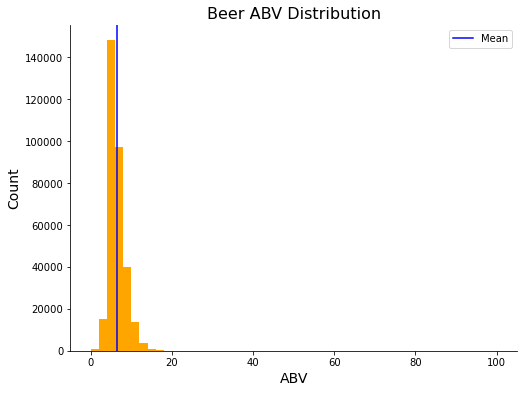

In [62]:
# visualize distribution of ABV

plt.figure(figsize = (8, 6))
plt.hist(beers_clean['abv'], bins = 50, color='orange')

plt.axvline(beers_clean['abv'].mean(), label='Mean', c='blue')

plt.title('Beer ABV Distribution', size = 16)
plt.xlabel('ABV', size = 14)
plt.ylabel('Count', size = 14)
plt.legend()
sns.despine()
plt.show()

In [63]:
# maximum abv value

beers_clean['abv'].max()

100.0

The mean ABV is around 6%, but there seems to be some beers that have 100% ABV! Although there are some beers that have higher than usual ABVs, this is definitely an error, so I will take a look at the beers with higher than 30% ABV and check if they were accurately entered.

In [64]:
# get all rows with ABV over 30% to check if they're accurate

high_abv = beers_clean.loc[(beers_clean['abv'] >= 30)]
high_abv

,id,name,brewery_id,state,country,availability,abv,notes,retired,category
11583,368014,Earache: World's Shortest Album,8396,GB2,GB,Year-round,100.00,No notes at this time.,f,dark ale
24630,51466,Schorschbräu Schorschbock 31%,6513,n/a,DE,Rotating,30.86,No notes at this time.,f,bock
33485,70633,Black Damnation VI - Messy,15237,n/a,BE,Limited (brewed once),39.00,No notes at this time.,t,stout
38092,54571,Tactical Nuclear Penguin,16315,GB6,GB,Rotating,32.00,Made by freezing Paradox to remove water.,f,stout
39446,57856,Schorschbräu Schorschbock 43%,6513,n/a,DE,Limited (brewed once),43.00,No notes at this time.,t,bock
51390,311921,Dark Reckoning,47203,CA,US,Limited (brewed once),80.00,No notes at this time.,f,porter
77348,176438,C-DOS Cuvée Delphine On Steroids Aka Pablo Eis...,15237,n/a,BE,Limited (brewed once),40.00,No notes at this time.,t,stout
136634,104620,Snake Venom,30178,GB6,GB,Limited (brewed once),67.50,Snake Venom is the world’s strongest beer as o...,t,strong ale
136684,366894,series 3,42486,ON,CA,Limited (brewed once),66.00,No notes at this time.,f,pale ale
145244,340204,Belgian Pale Ale,27946,CA,US,Rotating,56.00,No notes at this time.,f,pale ale


By doing a search on Google for each of the 3 beers with 100% ABV, I see that they should be 10%, so I will correct these values.

The next beers with unusually high ABVs are Dark Reckoning (80%), Snake Venom (67.5%), Series 3 (66%), Armageddon (65%), and Start the Future (60%). After some Google research, I found that only Dark Reckoning (should be 8%) and Series 3 (should be 6.6%) had incorrect ABV values, so I will correct these as well.

The rest of the beers on this list are also correct based on my Google research of each beer.

In [65]:
# impute correct abv values for beers with 100.0 abv
beers_clean.loc[beers_clean['id'] == 368014] = beers_clean.loc[beers_clean['id'] == 368014].replace(to_replace = 100.0, value = 10.0)
beers_clean.loc[beers_clean['id'] == 368012] = beers_clean.loc[beers_clean['id'] == 368012].replace(to_replace = 100.0, value = 10.0)
beers_clean.loc[beers_clean['id'] == 365307] = beers_clean.loc[beers_clean['id'] == 365307].replace(to_replace = 100.0, value = 10.0)

# impute correct abv values for beers with 80.0 abv
beers_clean.loc[beers_clean['id'] == 311921] = beers_clean.loc[beers_clean['id'] == 311921].replace(to_replace = 80.0, value = 8.0)

# impute correct abv values for beers with 66.0 abv
beers_clean.loc[beers_clean['id'] == 366894] = beers_clean.loc[beers_clean['id'] == 366894].replace(to_replace = 66.0, value = 6.6)

Given the wide range of ABV values, it would be useful to look at the average ABV's for each beer category of beer, since they might be quite different.

In [66]:
# take a look at the mean ABVs per beer category

beers_clean.groupby('category').mean()[['abv']].sort_values(by='abv', ascending=False)

,abv
category,
strong ale,9.429620
stout,8.204933
bock,7.567359
IPA,7.071842
dark ale,6.827258
porter,6.742318
hybrid,5.877523
brown ale,5.858070
specialty,5.743292


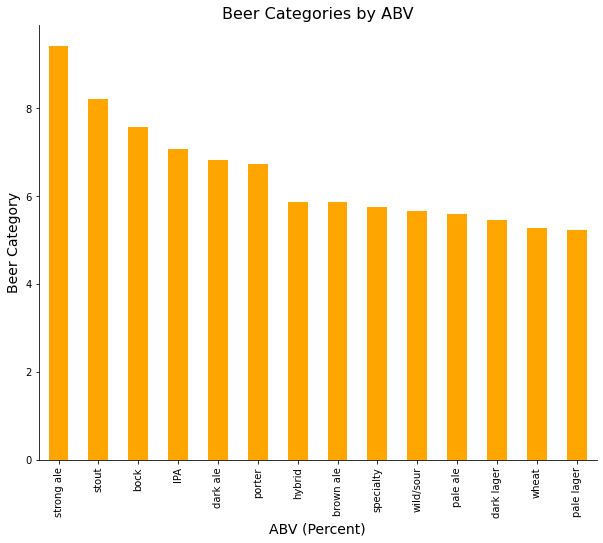

In [67]:
# visualize

plt.figure(figsize=(10, 8))
beers_clean.groupby('category')['abv'].mean().sort_values(ascending=False).plot(kind='bar', color='orange')
plt.xlabel('ABV (Percent)', size=14)
plt.ylabel('Beer Category', size=14)
plt.title('Beer Categories by ABV', size=16)
sns.despine()
plt.show()

In [68]:
print(f'ABV Mean: {beers_clean["abv"].mean()}')
print(f'ABV Mode: {beers_clean["abv"].mode()[0]}')
print(f'ABV Median: {beers_clean["abv"].median()}')

ABV Mean: 6.527250121845757
ABV Mode: 5.0
ABV Median: 6.0


The overall average ABV is 6.5% across all categories, but the average ABV values for each category ranges from 5% to 9%, with pale lagers having the lowest ABV and strong ales with the highest ABV. I will now impute the missing ABV values in the dataframe with the corresponding mean ABV for each beer category. 

In [69]:
# how many categories have missing ABV values 

missing_abv['category'].value_counts()

pale ale      8821
IPA           5409
stout         3842
specialty     3032
wheat         2702
pale lager    2649
wild/sour     2536
porter        2014
brown ale     1919
strong ale    1886
dark lager    1767
bock           872
dark ale       851
hybrid         497
Name: category, dtype: int64

All of the categories have missing values, so they all need to be imputed.

In [70]:
# impute missing abv values for each category with their mean

beers_clean.loc[beers_clean['category'] == 'strong ale'] = beers_clean.loc[beers_clean['category'] == 'strong ale'].fillna(9.4)
beers_clean.loc[beers_clean['category'] == 'stout'] = beers_clean.loc[beers_clean['category'] == 'stout'].fillna(8.2)
beers_clean.loc[beers_clean['category'] == 'bock'] = beers_clean.loc[beers_clean['category'] == 'bock'].fillna(7.6)
beers_clean.loc[beers_clean['category'] == 'IPA'] = beers_clean.loc[beers_clean['category'] == 'IPA'].fillna(7.1)
beers_clean.loc[beers_clean['category'] == 'dark ale'] = beers_clean.loc[beers_clean['category'] == 'dark ale'].fillna(6.8)
beers_clean.loc[beers_clean['category'] == 'porter'] = beers_clean.loc[beers_clean['category'] == 'porter'].fillna(6.7)
beers_clean.loc[beers_clean['category'] == 'hybrid'] = beers_clean.loc[beers_clean['category'] == 'hybrid'].fillna(5.9)
beers_clean.loc[beers_clean['category'] == 'brown ale'] = beers_clean.loc[beers_clean['category'] == 'brown ale'].fillna(5.9)
beers_clean.loc[beers_clean['category'] == 'specialty'] = beers_clean.loc[beers_clean['category'] == 'specialty'].fillna(5.7)
beers_clean.loc[beers_clean['category'] == 'wild/sour'] = beers_clean.loc[beers_clean['category'] == 'wild/sour'].fillna(5.7)
beers_clean.loc[beers_clean['category'] == 'pale ale'] = beers_clean.loc[beers_clean['category'] == 'pale ale'].fillna(5.6)
beers_clean.loc[beers_clean['category'] == 'dark lager'] = beers_clean.loc[beers_clean['category'] == 'dark lager'].fillna(5.5)
beers_clean.loc[beers_clean['category'] == 'wheat'] = beers_clean.loc[beers_clean['category'] == 'wheat'].fillna(5.3)
beers_clean.loc[beers_clean['category'] == 'pale lager'] = beers_clean.loc[beers_clean['category'] == 'pale lager'].fillna(5.2)

In [71]:
# check

beers_clean.isna().sum()

id              0
name            0
brewery_id      0
state           0
country         0
availability    0
abv             0
notes           0
retired         0
category        0
dtype: int64

There are no longer any missing values in the `beers_clean` dataframe.

Now, I will look at the `breweries_df` table to see if there are any columns about the breweries that I can add to the `beers_clean` dataframe.

---

### 3. Breweries Table

In [72]:
# look at first few rows

breweries_df.head()

,id,name,city,state,country,notes,types
0,19730,Brouwerij Danny,Erpe-Mere,NaN,BE,No notes at this time.,Brewery
1,32541,Coachella Valley Brewing Co,Thousand Palms,CA,US,No notes at this time.,"Brewery, Bar, Beer-to-go"
2,44736,Beef 'O' Brady's,Plant City,FL,US,No notes at this time.,"Bar, Eatery"
3,23372,Broadway Wine Merchant,Oklahoma City,OK,US,No notes at this time.,Store
4,35328,Brighton Beer Dispensary (DUPLICATE),Brighton,GB2,GB,Duplicate of https://www.beeradvocate.com/beer...,"Bar, Eatery"


Looking at the first few rows of the `breweries_df` table, I can see that the only column of interest is the brewery `types`. Many of the `notes` say "No notes at this time" so this column is of little use, and since I am more interested in looking at the individual beers, the actual brewery name is not relevant either. The `country` and `state` columns already exist in the `beers_clean` dataframe so those won't be needed as well. In terms of `city`, it doesn't provide much value to the characteristics of a beer, so I will not include that in our analysis.

Let's first check to see if there are any missing values in the `types` column.

In [73]:
# check missing values in 'types' column

breweries_df['types'].isna().sum()

0

There are no missing values in `types`, so I can merge it to our `beers_clean` table and save it as a new dataframe, `beers_breweries`.

In [74]:
# add `types` to `beers_clean` table and save as new dataframe
beers_breweries = pd.merge(beers_clean, breweries_df[['id', 'types']], how = 'left', left_on = ['brewery_id'], right_on=['id'])

# check
beers_breweries.head()

,id_x,name,brewery_id,state,country,availability,abv,notes,retired,category,id_y,types
0,202522,Olde Cogitator,2199,CA,US,Rotating,7.3,No notes at this time.,f,stout,2199,"Brewery, Bar, Eatery"
1,82352,Konrads Stout Russian Imperial Stout,18604,n/a,NO,Rotating,10.4,No notes at this time.,f,stout,18604,Brewery
2,214879,Scottish Right,44306,IN,US,Year-round,4.0,No notes at this time.,t,dark ale,44306,"Brewery, Bar, Eatery, Beer-to-go"
3,320009,MegaMeow Imperial Stout,4378,WA,US,Winter,8.7,Every time this year,f,stout,4378,Brewery
4,246438,Peaches-N-Cream,44617,PA,US,Rotating,5.1,No notes at this time.,f,hybrid,44617,"Brewery, Bar, Beer-to-go"


The `types` column was successfully added to our `beers_clean` table so now I can remove the `brewery_id` and `id_y` columns.

In [75]:
# drop `brewery_id` and `id_y` columns
beers_breweries = beers_breweries.drop(columns = ['brewery_id', 'id_y'])

# check
beers_breweries.head()

,id_x,name,state,country,availability,abv,notes,retired,category,types
0,202522,Olde Cogitator,CA,US,Rotating,7.3,No notes at this time.,f,stout,"Brewery, Bar, Eatery"
1,82352,Konrads Stout Russian Imperial Stout,n/a,NO,Rotating,10.4,No notes at this time.,f,stout,Brewery
2,214879,Scottish Right,IN,US,Year-round,4.0,No notes at this time.,t,dark ale,"Brewery, Bar, Eatery, Beer-to-go"
3,320009,MegaMeow Imperial Stout,WA,US,Winter,8.7,Every time this year,f,stout,Brewery
4,246438,Peaches-N-Cream,PA,US,Rotating,5.1,No notes at this time.,f,hybrid,"Brewery, Bar, Beer-to-go"


The `beers_breweries` no longer has the `brewery_id` and `id_y` columns. I will now merge this table to the `reviews_clean` table and create the complete dataframe `full_df`.

---

### 4. Merged Dataframe 

Before merging, let's take a look at the `reviews_clean` table again.

In [76]:
# look at first few rows of `reviews_clean` table

reviews_clean.head(3)

,beer_id,username,text,look,smell,taste,feel,overall,score,year,month,weekday
0,271781,bluejacket74,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03,2017,3,4
1,125646,_dirty_,,4.50,4.50,4.50,4.50,4.50,4.50,2017,12,3
2,125646,CJDUBYA,,4.75,4.75,4.75,4.75,4.75,4.75,2017,12,3


I can merge this table with the `beers_breweries` table by the `beer_id`.

In [77]:
# merge `reviews_clean` and 'beers_breweries` tables and save as new dataframe
full_df = pd.merge(reviews_clean, beers_breweries, how = 'left', left_on = ['beer_id'], right_on=['id_x'])

# check
full_df.head()

,beer_id,username,text,look,smell,taste,feel,overall,score,year,...,id_x,name,state,country,availability,abv,notes,retired,category,types
0,271781,bluejacket74,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03,2017,...,271781,Motorbreath Imperial Stout,OH,US,Limited (brewed once),10.8,2016 - Five Year Anniversary Imperial Stout,t,stout,"Brewery, Bar"
1,125646,_dirty_,,4.50,4.50,4.50,4.50,4.50,4.50,2017,...,125646,Haze,MA,US,Rotating,8.2,We constructed this beer around hops we curren...,f,IPA,"Brewery, Bar, Beer-to-go"
2,125646,CJDUBYA,,4.75,4.75,4.75,4.75,4.75,4.75,2017,...,125646,Haze,MA,US,Rotating,8.2,We constructed this beer around hops we curren...,f,IPA,"Brewery, Bar, Beer-to-go"
3,125646,GratefulBeerGuy,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58,2017,...,125646,Haze,MA,US,Rotating,8.2,We constructed this beer around hops we curren...,f,IPA,"Brewery, Bar, Beer-to-go"
4,125646,LukeGude,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31,2017,...,125646,Haze,MA,US,Rotating,8.2,We constructed this beer around hops we curren...,f,IPA,"Brewery, Bar, Beer-to-go"


In [78]:
# check shape

full_df.shape

(5281976, 22)

The two tables were successfully merged and the `full_df` now has 5,281,976 rows and 22 columns. For the purpose of this project's analysis, there are some columns that can be removed:

- `beer_id` and `id_x`
- `username`: the focus is on the beers, so the reviewer is not relevant here
- `name`: rather than looking at each unique beer, it would be more useful to focus on the beer category
- `notes`: there are many duplicate notes on the beers and some don't have any notes, so this is of little use for our analysis

In [79]:
# remove above mentioned columns
full_df = full_df.drop(columns = ['beer_id', 'id_x', 'username', 'name', 'notes'])

# check
full_df.head()

,text,look,smell,taste,feel,overall,score,year,month,weekday,state,country,availability,abv,retired,category,types
0,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03,2017,3,4,OH,US,Limited (brewed once),10.8,t,stout,"Brewery, Bar"
1,,4.50,4.50,4.50,4.50,4.50,4.50,2017,12,3,MA,US,Rotating,8.2,f,IPA,"Brewery, Bar, Beer-to-go"
2,,4.75,4.75,4.75,4.75,4.75,4.75,2017,12,3,MA,US,Rotating,8.2,f,IPA,"Brewery, Bar, Beer-to-go"
3,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58,2017,12,2,MA,US,Rotating,8.2,f,IPA,"Brewery, Bar, Beer-to-go"
4,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31,2017,12,2,MA,US,Rotating,8.2,f,IPA,"Brewery, Bar, Beer-to-go"


In [80]:
# check shape

full_df.shape

(5281976, 17)

In [81]:
# double check for missing values

full_df.isna().sum()

text            0
look            0
smell           0
taste           0
feel            0
overall         0
score           0
year            0
month           0
weekday         0
state           0
country         0
availability    0
abv             0
retired         0
category        0
types           0
dtype: int64

The dataframe now has 17 columns and no missing values. Let's look at the data types again.

In [82]:
# check data types

full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5281976 entries, 0 to 5281975
Data columns (total 17 columns):
 #   Column        Dtype  
---  ------        -----  
 0   text          object 
 1   look          float64
 2   smell         float64
 3   taste         float64
 4   feel          float64
 5   overall       float64
 6   score         float64
 7   year          int64  
 8   month         int64  
 9   weekday       int64  
 10  state         object 
 11  country       object 
 12  availability  object 
 13  abv           float64
 14  retired       object 
 15  category      object 
 16  types         object 
dtypes: float64(7), int64(3), object(7)
memory usage: 725.4+ MB


 Besides the `text` column, which will be dealt with later on, there are 6 categorical columns, which I will explore more, starting with the `retired` column.

---

#### `retired` Column

This column consists of boolean values, 't' for beers that are retired and no longer in production and 'f' for beers that are still active. Let's look at the distribution.

In [83]:
# get distribution of beers that are retired or not

full_df['retired'].value_counts(normalize=True)

f    0.817308
t    0.182692
Name: retired, dtype: float64

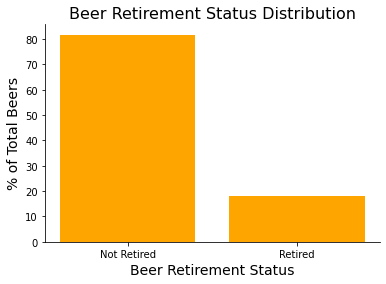

Beer `Retired` status distribution: [0.82 0.18]


In [84]:
# visualize

retired, counts = np.unique(full_df['retired'], return_counts=True)
retired_normalized_counts = counts/counts.sum()

plt.figure(figsize = (6, 4))
plt.bar(['Not Retired', 'Retired'], retired_normalized_counts*100, color="orange")
plt.xlabel('Beer Retirement Status', size = 14)
plt.ylabel('% of Total Beers', size = 14)
plt.title('Beer Retirement Status Distribution', size = 16)
sns.despine()
plt.show()

print(f"Beer `Retired` status distribution: {np.round(retired_normalized_counts, 2)}")

The majority of the beers reviewed are still active (82%). I will turn this into a binary column by assigning 't' with 1 and 'f' with 0.

In [85]:
# assign 1 to 't' and 0 to 'f' for `retired` column
full_df['retired'] = full_df['retired'].replace({'t': 1, 'f': 0})

# check
full_df['retired'].value_counts(normalize=True)

0    0.817308
1    0.182692
Name: retired, dtype: float64

Now I will move on to the `availability` column, which tells us how often the beer is produced.

---

#### `availability` Column

In [86]:
# look at unique values in `availability`

full_df['availability'].value_counts()

 Year-round                1771628
 Rotating                  1252448
Rotating                    538410
 Limited (brewed once)      459753
Year-round                  275198
 Winter                     253617
Limited (brewed once)       217554
 Fall                       170570
 Spring                      98035
 Summer                      97737
Winter                       48537
Fall                         38983
Spring                       29540
Summer                       29276
 Rotating                      339
 Limited (brewed once)         188
 Fall                           99
 Year-round                     34
 Winter                         20
 Summer                         10
Name: availability, dtype: int64

Looking at the unique values in the `availability` column, I can see that there was some data entry inconsistencies because the same categories appear more than once due to whitespaces in the names. These need to be removed.

In [87]:
# remove leading and trailing whitespaces in `availability` column
full_df['availability'] = full_df['availability'].str.strip()

# check
full_df['availability'].value_counts()

Year-round               2046860
Rotating                 1791197
Limited (brewed once)     677495
Winter                    302174
Fall                      209652
Spring                    127575
Summer                    127023
Name: availability, dtype: int64

This is much better. These are the following beer availability types:

1. Year-round: staple beers that are available at all times of the year
2. Rotating: beers that are in regular production but only available on a rotating basis
3. Limited (brewed once): very limited beers that were only produced once
4. Winter: seasonal beers available only in winter
5. Fall: seasonal beers available only in fall
6. Spring: seasonal beers available only in spring
7. Summer: seasonal beers available only in summer

Let's take a look at the distribution.

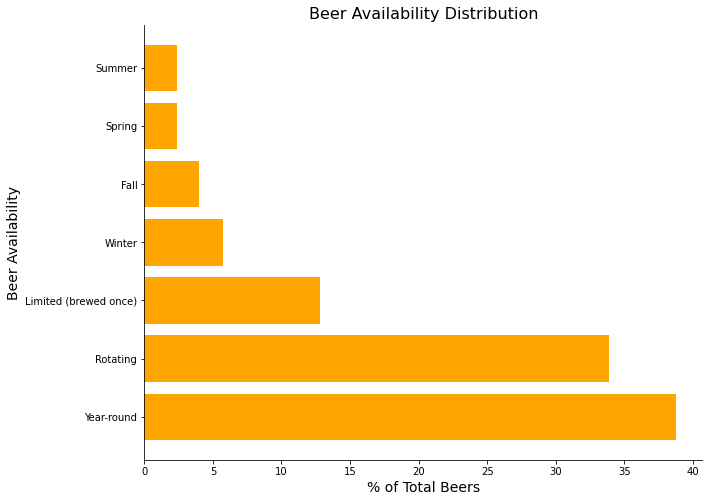

In [88]:
# save availability into dataframe with counts and percentage
avail_df = pd.DataFrame(full_df['availability'].value_counts(ascending=False)).reset_index().rename(columns={"index":"availability", "availability": "count"})

# add percentage column
avail_df['percentage'] = ((avail_df['count'])/(avail_df['count'].sum()))*100

# visualize category distribution
availability = list(avail_df['availability'])
values = list(avail_df['percentage'])

plt.figure(figsize = (10,8))
plt.barh(availability, values, color='orange')
plt.xlabel('% of Total Beers', size = 14)
plt.ylabel('Beer Availability', size = 14)
plt.title('Beer Availability Distribution', size = 16)
sns.despine()
plt.show()

About 70% of the beers are in active production, with ~38% of them being available year-round and ~34% are rotating beers. Limited beers that were only brewed once account for ~13% and of all the seasonal beers, winter beers are most prevalent.

Let's see if there are any differences in `score` ratings between the types of availability.

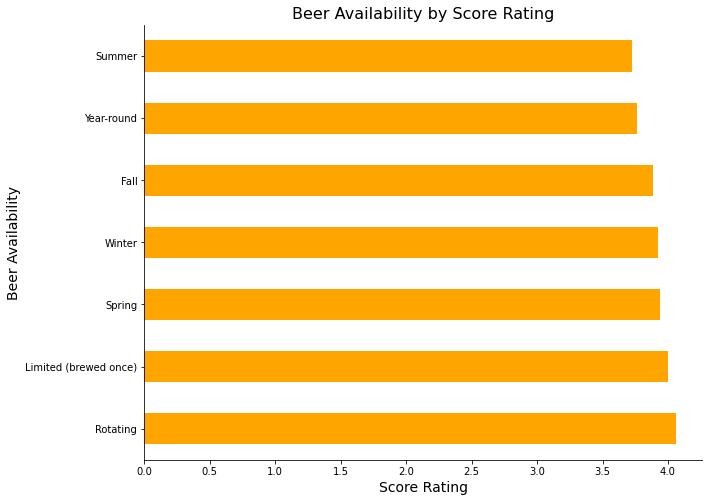

In [89]:
# visualize availability by `score` ratings

plt.figure(figsize=(10, 8))
full_df.groupby('availability')['score'].mean().sort_values(ascending=False).plot(kind='barh', color='orange')
plt.xlabel('Score Rating', size=14)
plt.ylabel('Beer Availability', size=14)
plt.title('Beer Availability by Score Rating', size=16)
sns.despine()
plt.show()

The average `score` ratings of the `availability` types are very similar, between ~3.7 and ~4.1. 

Moving on, I will explore the beer `category` column.

---

#### `category` Column

Let's take a look at the distribution of the beer categories now. First, I will put the categories and their counts into a dataframe.

In [90]:
# create category dataframe and get counts

category_df = pd.DataFrame(full_df['category'].value_counts(ascending=False)).reset_index().rename(columns={"index":"category", "category": "count"})
category_df

,category,count
0,IPA,1365259
1,pale ale,778320
2,stout,756284
3,strong ale,538829
4,wild/sour,346532
5,pale lager,320015
6,porter,227505
7,specialty,226577
8,wheat,213429
9,dark lager,146833


Now I can add a column that has the count percentages for each category.

In [91]:
# add percentage column

category_df['percentage'] = ((category_df['count'])/(category_df['count'].sum()))*100
category_df

,category,count,percentage
0,IPA,1365259,25.847505
1,pale ale,778320,14.735394
2,stout,756284,14.318202
3,strong ale,538829,10.201277
4,wild/sour,346532,6.560651
5,pale lager,320015,6.058623
6,porter,227505,4.307195
7,specialty,226577,4.289626
8,wheat,213429,4.040704
9,dark lager,146833,2.779888


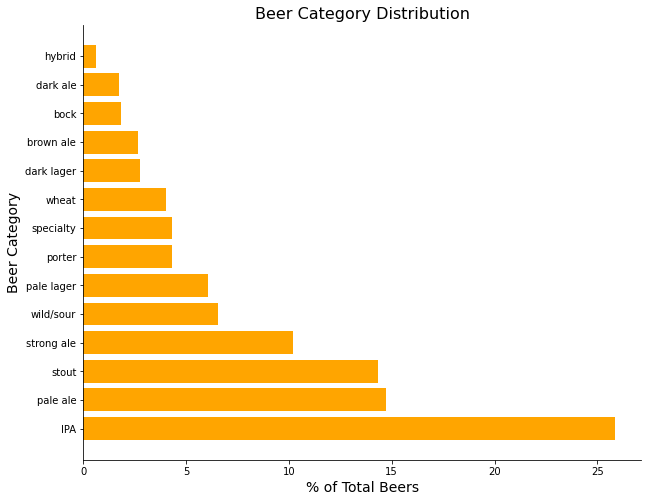

In [93]:
# visualize category distribution

category = list(category_df['category'])
values = list(category_df['percentage'])

plt.figure(figsize = (10,8))
plt.barh(category, values, color='orange')
plt.xlabel('% of Total Beers', size = 14)
plt.ylabel('Beer Category', size = 14)
plt.title('Beer Category Distribution', size = 16)
sns.despine()
plt.show()

The most reviewed beer categories in this dataset are IPAs (26%), pale ales (15%), and stouts (14%). Together, they make up just over half of the beers that were reviewed. The categories that were least reviewed were hybrid beers, dark ales, and bocks.

Let's look at which beer categories had the highest average `score` ratings.

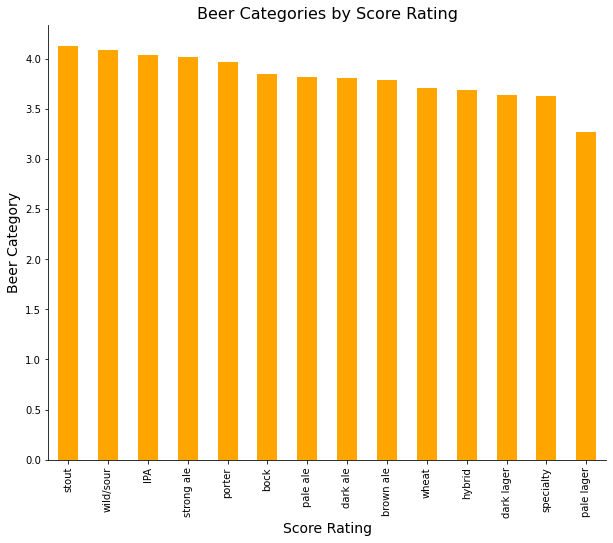

In [95]:
# visualize categories by `score` ratings

plt.figure(figsize=(10, 8))
full_df.groupby('category')['score'].mean().sort_values(ascending=False).plot(kind='bar', color='orange')
plt.xlabel('Score Rating', size=14)
plt.ylabel('Beer Category', size=14)
plt.title('Beer Categories by Score Rating', size=16)
sns.despine()
plt.show()

Most of the beer categories scored pretty well (above 3.5), with Stouts, Wild/Sours, and IPAs having the highest average scores. The category with the lowest average score is Pale Lagers (~3.3).

Now I will move on to the `country` column.

---

#### `country` Column 

In [96]:
# number of unique countries

full_df['country'].nunique()

159

There are 159 countries in this dataset. Let's look at the distribution of the top 20 countries with the most reviews.

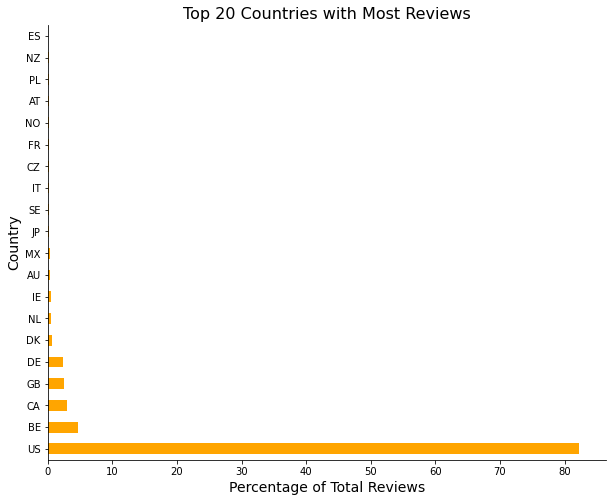

US    82.263702
BE     4.617533
CA     2.918813
GB     2.503495
DE     2.395903
DK     0.730408
NL     0.544626
IE     0.460964
AU     0.328873
MX     0.328211
JP     0.261209
SE     0.259524
IT     0.244984
CZ     0.199603
FR     0.181201
NO     0.166112
AT     0.151724
PL     0.129781
NZ     0.124234
ES     0.102746
Name: country, dtype: float64


In [97]:
# visualize distribution of top 20 brewery countries

plt.figure(figsize = (10, 8))
(full_df['country'].value_counts(normalize = True).head(20)*100).plot(kind = 'barh', color='orange')
plt.xlabel('Percentage of Total Reviews', size = 14)
plt.ylabel('Country', size = 14)
plt.title('Top 20 Countries with Most Reviews', size = 16)
sns.despine()
plt.show()

print(f'{full_df["country"].value_counts(normalize = True).head(20)*100}')

Over 80% of the breweries are in the United States. The next country with the most breweries is Belgium and that only makes up ~5% of the total breweries. Canada is third with ~3%, followed by Great Britain with ~2.5%, and Germany is fifth with ~2.4%. The rest of the countries each make up less than 6% of the total breweries.

Lastly, let's look at the brewery `types` column.

---

#### `types` Column

In [98]:
# number of unique brewery types
print(f'number of brewery types: {full_df["types"].nunique()}')

# value counts of brewery types
full_df['types'].value_counts()

number of brewery types: 17


Brewery, Bar, Beer-to-go                      1475754
Brewery, Bar, Eatery, Beer-to-go              1340143
Brewery                                       1107434
Brewery, Bar, Eatery                           539838
Brewery, Bar                                   434582
Brewery, Beer-to-go                            313168
Brewery, Bar, Eatery, Homebrew, Beer-to-go      22694
Brewery, Eatery                                 17734
Brewery, Eatery, Beer-to-go                     13062
Brewery, Bar, Homebrew, Beer-to-go              10626
Brewery, Homebrew                                4595
Brewery, Bar, Eatery, Homebrew                   1066
Brewery, Homebrew, Beer-to-go                     704
Bar, Eatery                                       307
Brewery, Bar, Homebrew                            216
Brewery, Eatery, Homebrew, Beer-to-go              51
Bar, Eatery, Beer-to-go                             2
Name: types, dtype: int64

There appears to be 17 different types of breweries, but it is because a brewery can have multiple types. First, I will split the various types to see how many there are and then dummy encode them to the dataframe. This process is adapted from <a href="https://www.kaggle.com/ruancmoral/beer-analysis">here</a>.

In [99]:
# create empty list to store brewery types
brewery_types = []

# iterate through types
for types in full_df['types']:
    # split brewery types and remove whitespaces
    types = types.split(',')
    types = [item.replace(" ", "") for item in types]
    brewery_types.extend(types)

# convert to sequence of iterable elements
brewery_types = set(brewery_types)

# get number of brewery types
print(len(brewery_types))

# check
brewery_types

5


{'Bar', 'Beer-to-go', 'Brewery', 'Eatery', 'Homebrew'}

In [100]:
# dummy encode brewery types in `full_df`
def split_brewery_type(types):
    if types.find(i) >-1:
        return 1
    else:
        return 0
    
# iterate over `full_df`
for i in brewery_types:
    full_df[i] = full_df['types'].apply(split_brewery_type)

# check
full_df.head()

,text,look,smell,taste,feel,overall,score,year,month,weekday,...,availability,abv,retired,category,types,Bar,Beer-to-go,Brewery,Eatery,Homebrew
0,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03,2017,3,4,...,Limited (brewed once),10.8,1,stout,"Brewery, Bar",1,0,1,0,0
1,,4.50,4.50,4.50,4.50,4.50,4.50,2017,12,3,...,Rotating,8.2,0,IPA,"Brewery, Bar, Beer-to-go",1,1,1,0,0
2,,4.75,4.75,4.75,4.75,4.75,4.75,2017,12,3,...,Rotating,8.2,0,IPA,"Brewery, Bar, Beer-to-go",1,1,1,0,0
3,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58,2017,12,2,...,Rotating,8.2,0,IPA,"Brewery, Bar, Beer-to-go",1,1,1,0,0
4,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31,2017,12,2,...,Rotating,8.2,0,IPA,"Brewery, Bar, Beer-to-go",1,1,1,0,0


The brewery types were succesfully dummy encoded; let's take a look at the distribution.

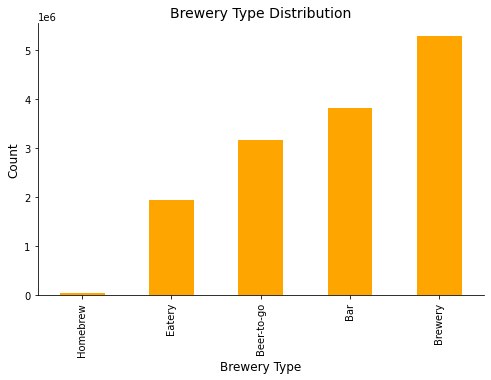

In [101]:
# visualize distribution of brewery types

plt.figure(figsize = (8, 5))
full_df[brewery_types].sum().sort_values().plot(kind='bar', color='orange')
plt.xlabel('Brewery Type', size=12)
plt.ylabel('Count', size=12)
plt.title('Brewery Type Distribution', size=14)
sns.despine()
plt.show()

The most common type of brewery is "brewery", but many of them are also bars and offer beer-to-go. Around 20% of them are eateries as well, but very few are homebrews. Now that the brewery types are dummy encoded, we can remove the `types` column from the dataframe.

In [102]:
# remove `types` column
full_df = full_df.drop(columns='types')

# check
full_df.head()

,text,look,smell,taste,feel,overall,score,year,month,weekday,...,country,availability,abv,retired,category,Bar,Beer-to-go,Brewery,Eatery,Homebrew
0,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03,2017,3,4,...,US,Limited (brewed once),10.8,1,stout,1,0,1,0,0
1,,4.50,4.50,4.50,4.50,4.50,4.50,2017,12,3,...,US,Rotating,8.2,0,IPA,1,1,1,0,0
2,,4.75,4.75,4.75,4.75,4.75,4.75,2017,12,3,...,US,Rotating,8.2,0,IPA,1,1,1,0,0
3,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58,2017,12,2,...,US,Rotating,8.2,0,IPA,1,1,1,0,0
4,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31,2017,12,2,...,US,Rotating,8.2,0,IPA,1,1,1,0,0


The `types` column was dropped but I will check again to make sure there are no missing values in our merged dataframe.

In [103]:
# double check for missing values

full_df.isna().sum()

text            0
look            0
smell           0
taste           0
feel            0
overall         0
score           0
year            0
month           0
weekday         0
state           0
country         0
availability    0
abv             0
retired         0
category        0
Bar             0
Beer-to-go      0
Brewery         0
Eatery          0
Homebrew        0
dtype: int64

---

## Final Data 

Here is a summary of all the columns in the merged dataframe:

| Merged Table | Description |
| :- | :- |
| `text` | additional text review |
| `look` | rating given by taster for the look of the beer on a scale of 1 to 5|
| `smell` | rating given by taster for the smell of the beer on a scale of 1 to 5 |
| `taste` | rating given by taster for the taste of the beer on a scale of 1 to 5 |
| `feel` | rating given by taster for the feel of the beer on a scale of 1 to 5 |
| `overall` | overall rating given by taster for the beer on a scale of 1 to 5 |
| `score` | weighted average of the previous 5 rating metrics on a scale of 1 to 5; this is our target for the classification models |
| `year` | year of review |
| `month` | month of review |
| `weekday` | day of the week of review |
| `state` | state where the beer was produced |
| `country` | country where the beer was produced |
| `availability` | availability of the beer - seasonal, rotating, or limited (only brewed once) |
| `abv` | alcohol by volume (percentage) |
| `retired` | whether the beer is retired or active |
| `category` | beer style category |
| `Brewery` | type of brewery (0 if no, 1 if yes) |
| `Beer-to-go` | type of brewery (0 if no, 1 if yes) |
| `Homebrew` | type of brewery (0 if no, 1 if yes) |
| `Eatery` | type of brewery (0 if no, 1 if yes) |

In [104]:
# get shape

full_df.shape

(5281976, 21)

In [105]:
# get data types again

full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5281976 entries, 0 to 5281975
Data columns (total 21 columns):
 #   Column        Dtype  
---  ------        -----  
 0   text          object 
 1   look          float64
 2   smell         float64
 3   taste         float64
 4   feel          float64
 5   overall       float64
 6   score         float64
 7   year          int64  
 8   month         int64  
 9   weekday       int64  
 10  state         object 
 11  country       object 
 12  availability  object 
 13  abv           float64
 14  retired       int64  
 15  category      object 
 16  Bar           int64  
 17  Beer-to-go    int64  
 18  Brewery       int64  
 19  Eatery        int64  
 20  Homebrew      int64  
dtypes: float64(7), int64(9), object(5)
memory usage: 886.6+ MB


The merged dataframe has 21 features, and besides the `text` column, there are 4 categorical columns that I need to deal with - either drop or turn into numerical values. But first, I will filter the dataset to reduce the number of rows, because once the text reviews are vectorized, the dataset will become very large and difficult to handle on my local machine.

The original dataset includes reviews from over 2 decades ago and the beer market has certainly changed and evolved a lot since. Therefore, in order to keep the analysis more relevant, I will only consider reviews from 2017 and onwards. 

In [106]:
# get only reviews from 2017 onwards
full_df = full_df.loc[full_df['year'] >= 2017]

# check
full_df.head()

,text,look,smell,taste,feel,overall,score,year,month,weekday,...,country,availability,abv,retired,category,Bar,Beer-to-go,Brewery,Eatery,Homebrew
0,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03,2017,3,4,...,US,Limited (brewed once),10.8,1,stout,1,0,1,0,0
1,,4.50,4.50,4.50,4.50,4.50,4.50,2017,12,3,...,US,Rotating,8.2,0,IPA,1,1,1,0,0
2,,4.75,4.75,4.75,4.75,4.75,4.75,2017,12,3,...,US,Rotating,8.2,0,IPA,1,1,1,0,0
3,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58,2017,12,2,...,US,Rotating,8.2,0,IPA,1,1,1,0,0
4,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31,2017,12,2,...,US,Rotating,8.2,0,IPA,1,1,1,0,0


In [107]:
# get shape

full_df.shape

(1024237, 21)

The dataset now has 1,024,237 reviews and 21 columns. This is still quite large. Since over 80% of the reviews are for beers in the US, I will focus the analysis to include only reviews from the US.

In [108]:
# get only reviews from the US
full_df = full_df.loc[full_df['country'] == 'US']

# check
full_df.head()

,text,look,smell,taste,feel,overall,score,year,month,weekday,...,country,availability,abv,retired,category,Bar,Beer-to-go,Brewery,Eatery,Homebrew
0,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03,2017,3,4,...,US,Limited (brewed once),10.8,1,stout,1,0,1,0,0
1,,4.50,4.50,4.50,4.50,4.50,4.50,2017,12,3,...,US,Rotating,8.2,0,IPA,1,1,1,0,0
2,,4.75,4.75,4.75,4.75,4.75,4.75,2017,12,3,...,US,Rotating,8.2,0,IPA,1,1,1,0,0
3,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58,2017,12,2,...,US,Rotating,8.2,0,IPA,1,1,1,0,0
4,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31,2017,12,2,...,US,Rotating,8.2,0,IPA,1,1,1,0,0


In [109]:
# get shape

full_df.shape

(890122, 21)

The dataframe now has 890,122 rows, and I can remove the `country` column because we are only dealing with reviews from the US. Also, there are 51 states, which is a lot to encode and since they probably won't tell us much about the beers, I will remove this column as well.

In [110]:
# remove `country` and `state` columns
full_df = full_df.drop(columns=['state', 'country'])

# check
full_df.head()

,text,look,smell,taste,feel,overall,score,year,month,weekday,availability,abv,retired,category,Bar,Beer-to-go,Brewery,Eatery,Homebrew
0,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03,2017,3,4,Limited (brewed once),10.8,1,stout,1,0,1,0,0
1,,4.50,4.50,4.50,4.50,4.50,4.50,2017,12,3,Rotating,8.2,0,IPA,1,1,1,0,0
2,,4.75,4.75,4.75,4.75,4.75,4.75,2017,12,3,Rotating,8.2,0,IPA,1,1,1,0,0
3,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58,2017,12,2,Rotating,8.2,0,IPA,1,1,1,0,0
4,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31,2017,12,2,Rotating,8.2,0,IPA,1,1,1,0,0


In [111]:
# get shape

full_df.shape

(890122, 19)

The `state` and `country` columns were properly dropped and our `full_df` table now has 890,122 rows and 19 columns. I will move on to turning the `availability`, `category`, and `text` columns into numerical values.

---

#### `availability` Column

For the beer `availability` column, there are only 7 options, so I will `OneHotEncode` them.

In [112]:
from sklearn.preprocessing import OneHotEncoder

# instantiate the OneHotEncoder

ohe = OneHotEncoder()

# convert the column into a dataframe first

availability_df = pd.DataFrame(full_df['availability'])

# fit the OneHotEncoder to the `availability` column and transform

ohe_availability = ohe.fit_transform(availability_df)
ohe_availability

<890122x7 sparse matrix of type '<class 'numpy.float64'>'
	with 890122 stored elements in Compressed Sparse Row format>

The beer availabilities were encoded successfully and returned a sparse matrix with the original number of rows across 7 columns. Since we need to add this back to our original dataset, we need to convert it to a dense matrix first, then put it into a dataframe.

In [113]:
# convert to dense

ohe_availability_dense = ohe_availability.toarray()
availability_df = pd.DataFrame(ohe_availability_dense, columns = ohe.categories_[0]).astype('int')

In [114]:
# check availability columns

availability_df.head()

,Fall,Limited (brewed once),Rotating,Spring,Summer,Winter,Year-round
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


I can now concat the one-hot-encoded availability columns to the full table, but I will create a new dataframe to combine them.

In [115]:
# create copy of `full_df`
final_df = full_df.copy()

# reset indexes
final_df.reset_index(drop=True, inplace=True)
availability_df.reset_index(drop=True, inplace=True)

# concat
final_df = pd.concat([final_df, availability_df], axis=1)

# get shape
final_df.shape

(890122, 26)

In [116]:
# check

pd.options.display.max_columns=None
final_df.head()

,text,look,smell,taste,feel,overall,score,year,month,weekday,availability,abv,retired,category,Bar,Beer-to-go,Brewery,Eatery,Homebrew,Fall,Limited (brewed once),Rotating,Spring,Summer,Winter,Year-round
0,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03,2017,3,4,Limited (brewed once),10.8,1,stout,1,0,1,0,0,0,1,0,0,0,0,0
1,,4.50,4.50,4.50,4.50,4.50,4.50,2017,12,3,Rotating,8.2,0,IPA,1,1,1,0,0,0,0,1,0,0,0,0
2,,4.75,4.75,4.75,4.75,4.75,4.75,2017,12,3,Rotating,8.2,0,IPA,1,1,1,0,0,0,0,1,0,0,0,0
3,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58,2017,12,2,Rotating,8.2,0,IPA,1,1,1,0,0,0,0,1,0,0,0,0
4,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31,2017,12,2,Rotating,8.2,0,IPA,1,1,1,0,0,0,0,1,0,0,0,0


The one-hot-encoded availability columns were added and we have the correct number of rows and columns so I can proceed to drop the original `availability` column as well as one of the new availability features to avoid multicollinearity. I will choose `Spring` as the one to drop.

In [117]:
# remove `availability` and `Spring` columns
final_df.drop(columns = ['availability', 'Spring'], inplace = True)

# check
final_df.head()

,text,look,smell,taste,feel,overall,score,year,month,weekday,abv,retired,category,Bar,Beer-to-go,Brewery,Eatery,Homebrew,Fall,Limited (brewed once),Rotating,Summer,Winter,Year-round
0,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03,2017,3,4,10.8,1,stout,1,0,1,0,0,0,1,0,0,0,0
1,,4.50,4.50,4.50,4.50,4.50,4.50,2017,12,3,8.2,0,IPA,1,1,1,0,0,0,0,1,0,0,0
2,,4.75,4.75,4.75,4.75,4.75,4.75,2017,12,3,8.2,0,IPA,1,1,1,0,0,0,0,1,0,0,0
3,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58,2017,12,2,8.2,0,IPA,1,1,1,0,0,0,0,1,0,0,0
4,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31,2017,12,2,8.2,0,IPA,1,1,1,0,0,0,0,1,0,0,0


In [126]:
# get shape
final_df.shape

(890122, 24)

The columns were dropped successfully and there are now 24 columns, which is correct, so I move on to the `category` column.

---

#### `category` Column

For the beer `category`, there are 14 styles, so I will `OneHotEncode` these as well using the same process as with the `availability` column.

In [118]:
# convert the column into a DataFrame first
category_df_2 = pd.DataFrame(final_df['category'])

# Fit the OneHotEncoder to the `category` column and transform
ohe_category = ohe.fit_transform(category_df_2)
ohe_category

<890122x14 sparse matrix of type '<class 'numpy.float64'>'
	with 890122 stored elements in Compressed Sparse Row format>

In [119]:
# convert to dense

ohe_category_dense = ohe_category.toarray()
category_df_2 = pd.DataFrame(ohe_category_dense, columns=ohe.categories_[0]).astype('int')

In [121]:
# check

category_df_2.head()

,IPA,bock,brown ale,dark ale,dark lager,hybrid,pale ale,pale lager,porter,specialty,stout,strong ale,wheat,wild/sour
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0


The individual category columns were properly one-hot-encoded, so they need to be added back to the `final_df` now. If done correctly, I should end up with 890,122 rows and 38 columns.

In [122]:
# add category columns back to final_df
# reset indexes
final_df.reset_index(drop=True, inplace=True)
category_df_2.reset_index(drop=True, inplace=True)

# concat
final_df = pd.concat([final_df, category_df_2], axis=1)

# get shape
final_df.shape

(890122, 38)

The concatenating of the columns was successful, so finally, the original `category` column needs to be dropped, and I will drop the `hybrid` column to avoid multicollinearity. I should end up with 36 columns if done successfully.

In [123]:
# drop 'category' and `hybrid` columns

final_df = final_df.drop(columns = ['category', 'hybrid'])
final_df.head()

,text,look,smell,taste,feel,overall,score,year,month,weekday,abv,retired,Bar,Beer-to-go,Brewery,Eatery,Homebrew,Fall,Limited (brewed once),Rotating,Summer,Winter,Year-round,IPA,bock,brown ale,dark ale,dark lager,pale ale,pale lager,porter,specialty,stout,strong ale,wheat,wild/sour
0,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03,2017,3,4,10.8,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,,4.50,4.50,4.50,4.50,4.50,4.50,2017,12,3,8.2,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,,4.75,4.75,4.75,4.75,4.75,4.75,2017,12,3,8.2,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58,2017,12,2,8.2,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31,2017,12,2,8.2,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [124]:
# get shape

final_df.shape

(890122, 36)

The `final_df` has the correct shape so I can move on now to the `text` column.

---

#### `text` Column

Due to the large size of the dataset, my computer was unable to combine the vectorized `text` reviews and concatenate to `final_df` as the system continuously crashed when trying to run the cell. Therefore, I will take a 5% sample of the dataset and use this to build my models later on.

In [133]:
# use 5% sample of dataset to prevent kernel from crashing

full_sample = final_df.sample(frac=0.05, random_state=1)
full_sample.shape

(44506, 36)

The sample dataset has 44,506 rows and 36 columns. I will now use a TF-IDF Vectorizer to tokenize the text reviews. First, I need to create a custom tokenizer (adapted from <a href="https://medium.com/@rohithramesh1991/unsupervised-text-clustering-using-natural-language-processing-nlp-1a8bc18b048d">here</a>) that will remove stopwords, digits, whitespaces, punctuation marks, and also lemmatize the words.

In [134]:
# create custom tokenizer
# import tools
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

# define tokenizer
def my_tokenizer(review):
    '''
    INPUT: string of text
    OUTPUT: cleaned text as list of words
    FUNCTION:
    1. Remove all punctuation
    2. Remove whitespaces
    3. Remove digits
    4. Remove stopwords
    5. Convert words to lowercase
    6. Lemmatize words
    '''
    stemmer = WordNetLemmatizer()
    sentence = [char for char in review if char not in string.punctuation]
    sentence = ''.join([i for i in sentence if not i.isdigit()])
    sentence = [word.lower() for word in sentence.split() if word not in stopwords.words('english')]
    return [stemmer.lemmatize(word) for word in sentence]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lynnho/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/lynnho/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Before performing the TF-IDF Vectorizer, I will first make a copy of the `full_sample` dataframe in case anything goes wrong, I will still have that table to work with.

In [135]:
# create copy of `full_sample`

sample_df = full_sample.copy()

For the TF-IDF Vectorizer, I will set the `min_df` to 10 instead of the default of 1, which means only words that occur in at least 10 documents will be considered. This will help reduce the number of words in the dataset.

In [136]:
from sklearn.feature_extraction.text import TfidfVectorizer

# use custom tokenizer in TfidfVectorizer
tfidf = TfidfVectorizer(min_df=10, tokenizer=my_tokenizer)

# fit to `text` column
tfidf.fit(sample_df['text'])

# transform
text_transformed = tfidf.transform(sample_df['text'])
text_transformed

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


<44506x3651 sparse matrix of type '<class 'numpy.float64'>'
	with 489294 stored elements in Compressed Sparse Row format>

The `text` reviews were vectorized successfully and returned a sparse matrix with the original number of rows across 3,651 columns. Since we need to add this back to our `sample_df` dataset, we need to convert it to a dense matrix first and then combine it.

In [137]:
# convert do dense
text_transformed = pd.DataFrame(text_transformed.todense(), columns = tfidf.get_feature_names())

# check
pd.options.display.max_columns=200
text_transformed.head()

,aal,aaroma,abbey,able,abound,abrasive,absent,absolute,absolutely,absurd,abundance,abundant,abv,abyss,accent,accented,accentuate,acceptable,access,accessible,accompanied,accompany,accompanying,according,account,acetic,achieve,acid,acidic,acidity,acquired,acre,acrid,across,act,action,active,actual,actually,adam,add,added,adding,addition,additional,additive,adequate,adequately,adjunct,admit,admittedly,advertised,advocate,affair,affordable,aforementioned,afternoon,aftertaste,afterthought,afterwards,age,aged,aggressive,aggressively,aging,ago,agree,ah,ahead,ahh,aid,aint,aipa,aipas,air,airy,akin,albeit,alchemist,alcohol,alcoholic,ale,alive,allagash,allaround,allow,allowed,allowing,allows,allspice,almond,almost,alone,along,alongside,alot,alpha,alpine,already,alright,...,wide,width,wife,wild,wildflower,willi,willing,win,window,wine,winelike,winey,wing,winner,winter,wisconsin,wise,wish,wisp,wispy,wit,witbier,within,without,wonder,wonderful,wonderfully,wondering,wont,won’t,wood,woodiness,woodsy,woody,woodychandler,word,work,worked,working,world,worldclass,worried,worse,worst,worth,worthy,would,wouldnt,wouldn’t,wouldve,wow,wrap,wrapped,write,writing,written,wrong,x,ya,yarchives,yard,yeah,year,yeast,yeastiness,yeastoak,yeasty,yellow,yellowgold,yellowish,yelloworange,yep,yes,yesterday,yet,yield,yielded,ymmv,yogurt,york,youd,youll,young,youre,youve,you’re,yuengling,yum,yummy,yuzu,zero,zest,zesty,zing,zip,zippy,zone,–,—,”
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

I can see that the last 3 columns here are symbols and the first column is not an actual word, so I will remove these columns manually. I should have 3,647 columns after removal.

In [138]:
# remove last 3 columns
text_transformed = text_transformed.iloc[: , :-3]

# remove first column
text_transformed = text_transformed.iloc[: , 1:]

# check
text_transformed.head()

,aaroma,abbey,able,abound,abrasive,absent,absolute,absolutely,absurd,abundance,abundant,abv,abyss,accent,accented,accentuate,acceptable,access,accessible,accompanied,accompany,accompanying,according,account,acetic,achieve,acid,acidic,acidity,acquired,acre,acrid,across,act,action,active,actual,actually,adam,add,added,adding,addition,additional,additive,adequate,adequately,adjunct,admit,admittedly,advertised,advocate,affair,affordable,aforementioned,afternoon,aftertaste,afterthought,afterwards,age,aged,aggressive,aggressively,aging,ago,agree,ah,ahead,ahh,aid,aint,aipa,aipas,air,airy,akin,albeit,alchemist,alcohol,alcoholic,ale,alive,allagash,allaround,allow,allowed,allowing,allows,allspice,almond,almost,alone,along,alongside,alot,alpha,alpine,already,alright,also,...,whoa,whole,wicked,wide,width,wife,wild,wildflower,willi,willing,win,window,wine,winelike,winey,wing,winner,winter,wisconsin,wise,wish,wisp,wispy,wit,witbier,within,without,wonder,wonderful,wonderfully,wondering,wont,won’t,wood,woodiness,woodsy,woody,woodychandler,word,work,worked,working,world,worldclass,worried,worse,worst,worth,worthy,would,wouldnt,wouldn’t,wouldve,wow,wrap,wrapped,write,writing,written,wrong,x,ya,yarchives,yard,yeah,year,yeast,yeastiness,yeastoak,yeasty,yellow,yellowgold,yellowish,yelloworange,yep,yes,yesterday,yet,yield,yielded,ymmv,yogurt,york,youd,youll,young,youre,youve,you’re,yuengling,yum,yummy,yuzu,zero,zest,zesty,zing,zip,zippy,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

The columns were successfully dropped so now I can combine the `text_transformed` and `sample_df` tables, then drop the original `text` column. If this is all done correctly, I should end up with a dataframe with 44,506 rows and 3,682 columns.

First, I need to reset the index for `sample_df`.

In [139]:
# reset index
sample_df = sample_df.reset_index(drop = True)

# concat tables
sample_df = pd.concat([sample_df, text_transformed], axis = 1)

# drop `text` column
sample_df = sample_df.drop(columns = 'text')

# check
sample_df.head()

,look,smell,taste,feel,overall,score,year,month,weekday,abv,retired,Beer-to-go,Brewery,Eatery,Homebrew,Bar,Fall,Limited (brewed once),Rotating,Summer,Winter,Year-round,IPA,bock,brown ale,dark ale,dark lager,pale ale,pale lager,porter,specialty,stout,strong ale,wheat,wild/sour,aaroma,abbey,able,abound,abrasive,absent,absolute,absolutely,absurd,abundance,abundant,abv,abyss,accent,accented,accentuate,acceptable,access,accessible,accompanied,accompany,accompanying,according,account,acetic,achieve,acid,acidic,acidity,acquired,acre,acrid,across,act,action,active,actual,actually,adam,add,added,adding,addition,additional,additive,adequate,adequately,adjunct,admit,admittedly,advertised,advocate,affair,affordable,aforementioned,afternoon,aftertaste,afterthought,afterwards,age,aged,aggressive,aggressively,aging,ago,...,whoa,whole,wicked,wide,width,wife,wild,wildflower,willi,willing,win,window,wine,winelike,winey,wing,winner,winter,wisconsin,wise,wish,wisp,wispy,wit,witbier,within,without,wonder,wonderful,wonderfully,wondering,wont,won’t,wood,woodiness,woodsy,woody,woodychandler,word,work,worked,working,world,worldclass,worried,worse,worst,worth,worthy,would,wouldnt,wouldn’t,wouldve,wow,wrap,wrapped,write,writing,written,wrong,x,ya,yarchives,yard,yeah,year,yeast,yeastiness,yeastoak,yeasty,yellow,yellowgold,yellowish,yelloworange,yep,yes,yesterday,yet,yield,yielded,ymmv,yogurt,york,youd,youll,young,youre,youve,you’re,yuengling,yum,yummy,yuzu,zero,zest,zesty,zing,zip,zippy,zone
0,4.00,3.75,3.75,4.0,4.00,3.84,2017,2,5,4.20,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.00,2.75,2.50,4.0,2.50,2.80,2018,6,5,6.40,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.00,4.00,4.00,4.0,4.25,4.05,2017,10,6,6.50,0,1,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.50,5.00,4.75,4.5,4.75,4.77,2018,8,6,6.75,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [140]:
# get shape

sample_df.shape

(44506, 3682)

The final dataframe that will be used for modelling is now complete. I will save it as a separate csv file as `beer_sample_cleaned.csv`.

In [141]:
sample_df.to_csv('data/beer_sample_cleaned.csv', index = False)

The file was saved properly and can be downloaded <a href="https://drive.google.com/file/d/105_ToiDUQCiGLWTjEPsimHPx7SrnPB1I/view?usp=sharing">here</a>.

---

## Summary 

The orignal dataset included 3 tables - one each for the beer reviews, beers, and breweries. After cleaning the missing values and turning categorical columns into numerical values, filtering the data to the most relevant reviews (from 2017 onwards and in the US only), I used a TF-IDF Vectorizer to tokenize the text reviews, ending with a final dataframe with 3,682 columns. Due to the size of the dataset and limited computational power, I extracted a 5% sample of the original to get 44,506 reviews to work with for further modelling.

Here are some initial insights of the dataset based on basic exploratory data analysis:
- Over 80% of the beers reviewed were in the US.
- Of the 14 categories of beers, IPAs were most frequently reviewed.
- Stouts, Wild/Sours, and IPAs had the highest average `score` ratings.
- Pale Lagers had the lowest average `score` ratings.
- The average `score` ratings are quite even among the different beer availability types.
- The average ABV of the beers reviewed is 6.5% and the beer categories that have average ABVs above this level are Strong Ales, Stouts, Bocks, IPAs, Dark Ales, and Porters.
- Looking at the top rated beer categories, we can see that beers with higher ABVs generally rated higher.

The next part of the project is in the Jupyter notebook titled `beer_classification` and it will be using the `beer_sample_cleaned.csv` file.

---

<a id='footnotes'></a>
### Footnotes

1. <a href="https://www.researchandmarkets.com/reports/5311876/beer-market-global-industry-trends-share-size?utm_source=GNOM&utm_medium=PressRelease&utm_code=9jd53n&utm_campaign=1526751+-+Global+Beer+Market+Report+2021%3a+Market+Reached+a+Value+of+%24623.2+Billion+in+2020+-+Forecast+to+2026&utm_exec=chdo54prd">Research and Markets</a>
2. <a href="https://www.brewersassociation.org/statistics-and-data/national-beer-stats/">The Brewers Association</a>
3. <a href="https://www.fortunebusinessinsights.com/industry-reports/craft-beer-market-100736">Fortune Business Insights</a>
4. <a href="https://www.craftbeer.com/beer/beer-styles-guide">CraftBeer.com</a>